In [1]:
!pip3 install -q xlrd xlwt
!pip3 install -q openpyxl
!pip3 install -q scipy
!pip3 install -q pandas
!pip3 install -q matplotlib
!pip3 install -q seaborn
# !pip3 install -q keras
!pip3 install -q tensorflow



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


markers_cycler = itertools.cycle(('o', 'v', '^', '<', '>', 's', 'D','8', 'p','*','h','H','d','+','X',))  
linestyle_cycler = itertools.cycle(('-', '--', '-.', ':', '', (0, (1, 10)), (0, (1, 1)), (0, (1, 1)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1)), (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 10, 1, 10, 1, 10)), (0, (3, 1, 1, 1, 1, 1))))

In [3]:
fileData = 'refineryData'

dataFolder = 'data'
# rawPath = os.path.join(dataFolder, fileData + '.xlsx')
# rawDataset = pd.read_excel(rawPath, engine='openpyxl')

rawPath = os.path.join(dataFolder, fileData + '.xlsx')
rawDataset = pd.read_excel(rawPath, 
                            index_col=0
                            )

# create result folder
outFolder = 'dataOut'
if not os.path.exists(outFolder):
    os.mkdir(outFolder)

# create work result folder
workPath = os.path.join(outFolder, fileData)
if not os.path.exists(workPath):
    os.mkdir(workPath)

filePath = os.path.join(workPath, fileData)

In [4]:
# rawDataset = pd.read_excel('.xls', index_col=0)
rawDataset

Stack   DischargeTemp  Diameter   ExitVelocity  ReleaseHeight   PM10  \
SN                                                                          
1    Flare1           1540       6.60          4.52           66.0   0.00   
2    Flare2           1540       6.60          4.52           66.0   0.00   
3    Flare3            330       2.75         23.47           67.0   0.00   
4      FCCU            550       2.18          9.05           30.0   0.00   
5   Boiler3            550       2.18          9.05           30.0   0.00   
..      ...            ...        ...           ...            ...    ...   
72   Flare1            980       1.28          2.88           42.0   0.00   
73     FCCU             19     350.00          1.39           19.0   0.00   
74  Boiler1             19       0.00          1.39           19.0   0.00   
75  Heater1            420       1.28          5.11           28.0  31.28   
76  Heater2            420       1.28          5.11           28.0  31.28   

        SO2        NOX     VOC        CO  
SN                                        
1      0.00      0.001   0.003     0.005  
2      0.00      0.001   0.003     0.005  
3     54.50      7.900  24.300  1510.400  
4    304.10   1420.100   0.000   106.000  
5    304.10   1420.100   0.000   106.000  
..      ...        ...     ...       ...  
72     0.00      0.010   0.030     0.070  
73  2930.40  13678.800   0.000   983.800  
74     0.00  13678.800   0.000   983.800  
75   636.14   2436.810  13.900   222.480  
76   636.14   2436.810  13.900   222.480  

[74 rows x 10 columns]

In [5]:
rawDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1 to 76
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stack          74 non-null     object 
 1   DischargeTemp  74 non-null     int64  
 2   Diameter       74 non-null     float64
 3   ExitVelocity   74 non-null     float64
 4   ReleaseHeight  74 non-null     float64
 5   PM10           74 non-null     float64
 6   SO2            74 non-null     float64
 7   NOX            74 non-null     float64
 8   VOC            74 non-null     float64
 9   CO             74 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.4+ KB


In [6]:
dataset = rawDataset.copy()
dataset.head()

Stack   DischargeTemp  Diameter   ExitVelocity  ReleaseHeight  PM10  \
SN                                                                         
1    Flare1           1540       6.60          4.52           66.0   0.0   
2    Flare2           1540       6.60          4.52           66.0   0.0   
3    Flare3            330       2.75         23.47           67.0   0.0   
4      FCCU            550       2.18          9.05           30.0   0.0   
5   Boiler3            550       2.18          9.05           30.0   0.0   

      SO2       NOX     VOC        CO  
SN                                     
1     0.0     0.001   0.003     0.005  
2     0.0     0.001   0.003     0.005  
3    54.5     7.900  24.300  1510.400  
4   304.1  1420.100   0.000   106.000  
5   304.1  1420.100   0.000   106.000

In [7]:
dataset.isna().sum()

Stack            0
DischargeTemp    0
Diameter         0
ExitVelocity     0
ReleaseHeight    0
PM10             0
SO2              0
NOX              0
VOC              0
CO               0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
boolCols = []

for col in boolCols:
    dict_colData = { x:i+2 for i,x in enumerate(rawDataset[col].unique())}
    dict_colData['Failed']=0
    dict_colData['Passed']=1
    print(dict_colData)
    dataset[col] = dataset[col].map(dict_colData)
    
# dataset = pd.get_dummies(dataset, prefix=prefix, prefix_sep='_')
dataset

Stack   DischargeTemp  Diameter   ExitVelocity  ReleaseHeight   PM10  \
SN                                                                          
1    Flare1           1540       6.60          4.52           66.0   0.00   
2    Flare2           1540       6.60          4.52           66.0   0.00   
3    Flare3            330       2.75         23.47           67.0   0.00   
4      FCCU            550       2.18          9.05           30.0   0.00   
5   Boiler3            550       2.18          9.05           30.0   0.00   
..      ...            ...        ...           ...            ...    ...   
72   Flare1            980       1.28          2.88           42.0   0.00   
73     FCCU             19     350.00          1.39           19.0   0.00   
74  Boiler1             19       0.00          1.39           19.0   0.00   
75  Heater1            420       1.28          5.11           28.0  31.28   
76  Heater2            420       1.28          5.11           28.0  31.28   

        SO2        NOX     VOC        CO  
SN                                        
1      0.00      0.001   0.003     0.005  
2      0.00      0.001   0.003     0.005  
3     54.50      7.900  24.300  1510.400  
4    304.10   1420.100   0.000   106.000  
5    304.10   1420.100   0.000   106.000  
..      ...        ...     ...       ...  
72     0.00      0.010   0.030     0.070  
73  2930.40  13678.800   0.000   983.800  
74     0.00  13678.800   0.000   983.800  
75   636.14   2436.810  13.900   222.480  
76   636.14   2436.810  13.900   222.480  

[74 rows x 10 columns]

In [10]:
prefix = ['Static']
dataset = pd.get_dummies(dataset, prefix=prefix, prefix_sep='_')
dataset

DischargeTemp  Diameter   ExitVelocity  ReleaseHeight   PM10      SO2  \
SN                                                                          
1            1540       6.60          4.52           66.0   0.00     0.00   
2            1540       6.60          4.52           66.0   0.00     0.00   
3             330       2.75         23.47           67.0   0.00    54.50   
4             550       2.18          9.05           30.0   0.00   304.10   
5             550       2.18          9.05           30.0   0.00   304.10   
..            ...        ...           ...            ...    ...      ...   
72            980       1.28          2.88           42.0   0.00     0.00   
73             19     350.00          1.39           19.0   0.00  2930.40   
74             19       0.00          1.39           19.0   0.00     0.00   
75            420       1.28          5.11           28.0  31.28   636.14   
76            420       1.28          5.11           28.0  31.28   636.14   

          NOX     VOC        CO  Static_Boiler1  Static_Boiler2  \
SN                                                                
1       0.001   0.003     0.005               0               0   
2       0.001   0.003     0.005               0               0   
3       7.900  24.300  1510.400               0               0   
4    1420.100   0.000   106.000               0               0   
5    1420.100   0.000   106.000               0               0   
..        ...     ...       ...             ...             ...   
72      0.010   0.030     0.070               0               0   
73  13678.800   0.000   983.800               0               0   
74  13678.800   0.000   983.800               1               0   
75   2436.810  13.900   222.480               0               0   
76   2436.810  13.900   222.480               0               0   

    Static_Boiler3  Static_Boiler4  Static_FCCU  Static_Flare1  Static_Flare2  \
SN                                                                              
1                0               0            0              1              0   
2                0               0            0              0              1   
3                0               0            0              0              0   
4                0               0            1              0              0   
5                1               0            0              0              0   
..             ...             ...          ...            ...            ...   
72               0               0            0              1              0   
73               0               0            1              0              0   
74               0               0            0              0              0   
75               0               0            0              0              0   
76               0               0            0              0              0   

    Static_Flare3  Static_Flare4  Static_Heater1  Static_Heater2  
SN                                                                
1               0              0               0               0  
2               0              0               0               0  
3               1              0               0               0  
4               0              0               0               0  
5               0              0               0               0  
..            ...            ...             ...             ...  
72              0              0               0               0  
73              0              0               0               0  
74              0              0               0               0  
75              0              0               1               0  
76              0              0               0               1  

[74 rows x 20 columns]

In [11]:
allCols = dataset.columns
allCols

Index(['DischargeTemp', 'Diameter ', 'ExitVelocity', 'ReleaseHeight', 'PM10',
       'SO2', 'NOX', 'VOC', 'CO', 'Static_Boiler1', 'Static_Boiler2',
       'Static_Boiler3', 'Static_Boiler4', 'Static_FCCU', 'Static_Flare1',
       'Static_Flare2', 'Static_Flare3', 'Static_Flare4', 'Static_Heater1',
       'Static_Heater2'],
      dtype='object')

In [12]:
outFeatures = ['PM10', 'SO2', 'NOX', 'VOC', 'CO']
inFeatures = [x for x in allCols if x not in outFeatures ]

In [13]:
favCols = outFeatures + ['DischargeTemp', 'ExitVelocity']
favCols

['PM10', 'SO2', 'NOX', 'VOC', 'CO', 'DischargeTemp', 'ExitVelocity']

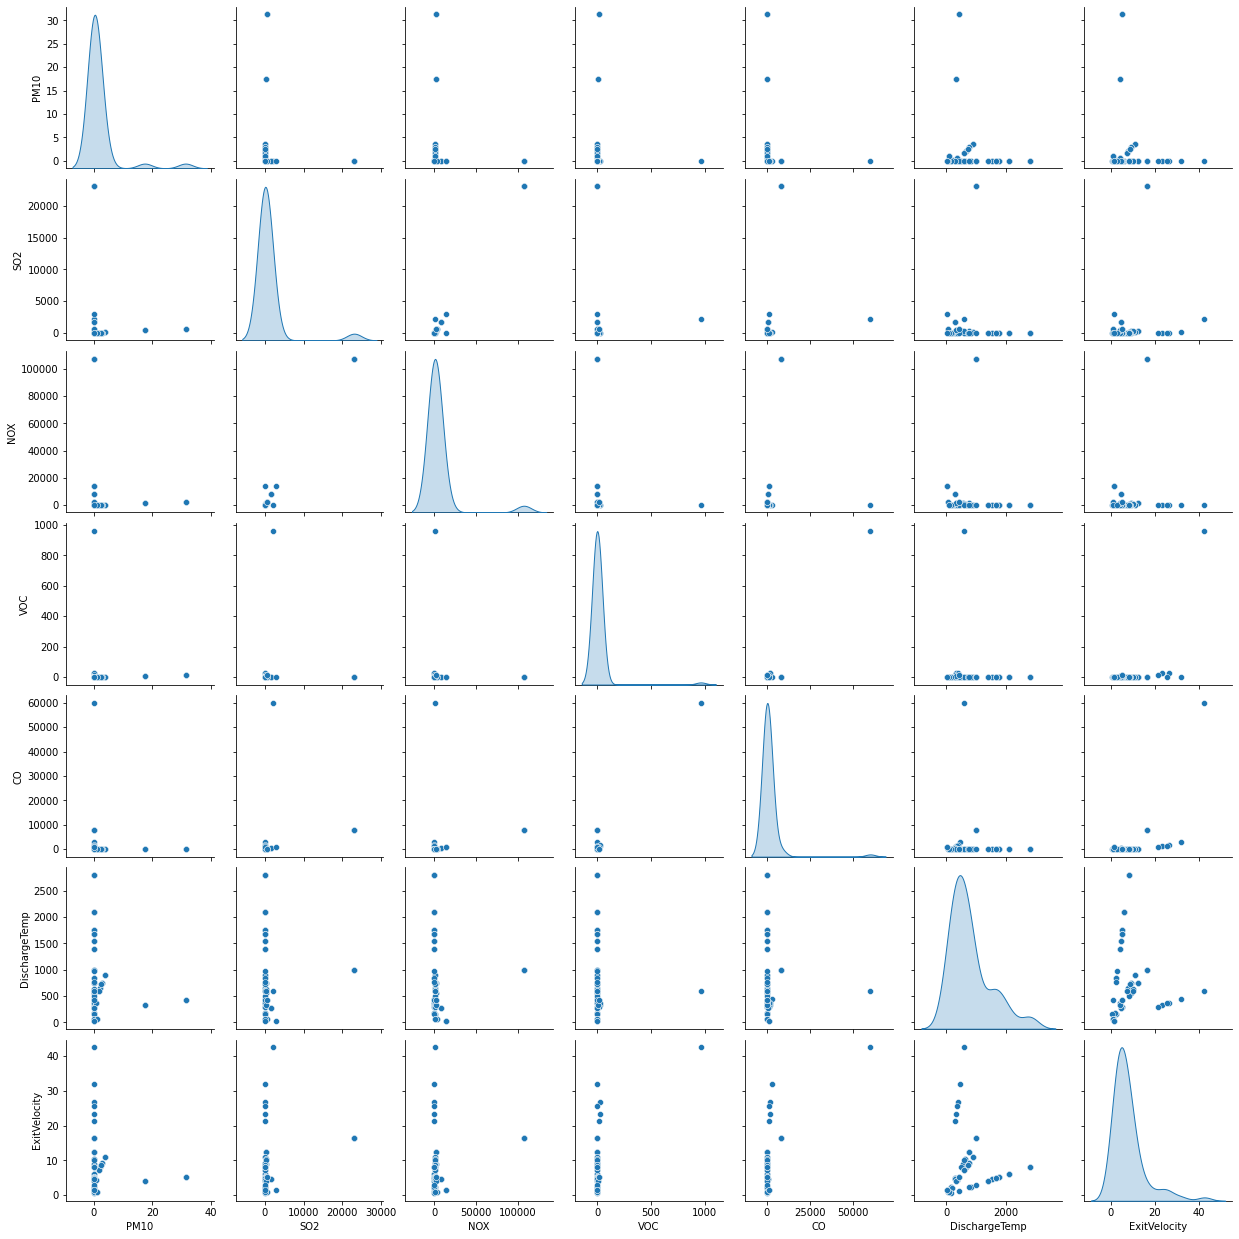

In [14]:
sns.pairplot(dataset[favCols], diag_kind='kde')

fname = filePath + '_pairplot_fav'

plt.savefig(fname + '.svg')
plt.savefig(fname + '.png')

plt.show()


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1 to 76
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DischargeTemp   74 non-null     int64  
 1   Diameter        74 non-null     float64
 2   ExitVelocity    74 non-null     float64
 3   ReleaseHeight   74 non-null     float64
 4   PM10            74 non-null     float64
 5   SO2             74 non-null     float64
 6   NOX             74 non-null     float64
 7   VOC             74 non-null     float64
 8   CO              74 non-null     float64
 9   Static_Boiler1  74 non-null     uint8  
 10  Static_Boiler2  74 non-null     uint8  
 11  Static_Boiler3  74 non-null     uint8  
 12  Static_Boiler4  74 non-null     uint8  
 13  Static_FCCU     74 non-null     uint8  
 14  Static_Flare1   74 non-null     uint8  
 15  Static_Flare2   74 non-null     uint8  
 16  Static_Flare3   74 non-null     uint8  
 17  Static_Flare4   74 non-null     uint8

In [16]:
dataset.describe().transpose()

count         mean           std       min      25%      50%  \
DischargeTemp    74.0   796.148649    683.951466  19.00000  330.000  600.000   
Diameter         74.0     6.766216     40.468300   0.00000    1.100    2.180   
ExitVelocity     74.0     7.922973      7.479620   0.49000    4.110    5.120   
ReleaseHeight    74.0    44.836486     30.026813   3.00000   22.000   40.000   
PM10             74.0     1.730000      5.751183   0.00000    0.000    0.000   
SO2              74.0  1139.564865   4560.319072   0.00000    0.000   45.100   
NOX              74.0  5328.551460  21321.434384   0.00007    0.035  108.100   
VOC              74.0    14.810844    111.852222   0.00000    0.000    0.003   
CO               74.0  1326.370059   7103.967082   0.00040    0.225   18.700   
Static_Boiler1   74.0     0.081081      0.274823   0.00000    0.000    0.000   
Static_Boiler2   74.0     0.054054      0.227668   0.00000    0.000    0.000   
Static_Boiler3   74.0     0.040541      0.198569   0.00000    0.000    0.000   
Static_Boiler4   74.0     0.013514      0.116248   0.00000    0.000    0.000   
Static_FCCU      74.0     0.135135      0.344201   0.00000    0.000    0.000   
Static_Flare1    74.0     0.162162      0.371116   0.00000    0.000    0.000   
Static_Flare2    74.0     0.081081      0.274823   0.00000    0.000    0.000   
Static_Flare3    74.0     0.081081      0.274823   0.00000    0.000    0.000   
Static_Flare4    74.0     0.054054      0.227668   0.00000    0.000    0.000   
Static_Heater1   74.0     0.148649      0.358170   0.00000    0.000    0.000   
Static_Heater2   74.0     0.148649      0.358170   0.00000    0.000    0.000   

                      75%        max  
DischargeTemp    995.0000    2800.00  
Diameter           2.7500     350.00  
ExitVelocity       9.1100      42.68  
ReleaseHeight     64.7500     122.00  
PM10               0.6000      31.28  
SO2              236.1500   23040.00  
NOX             1102.8750  107605.40  
VOC                0.3500     962.90  
CO               130.7875   60006.00  
Static_Boiler1     0.0000       1.00  
Static_Boiler2     0.0000       1.00  
Static_Boiler3     0.0000       1.00  
Static_Boiler4     0.0000       1.00  
Static_FCCU        0.0000       1.00  
Static_Flare1      0.0000       1.00  
Static_Flare2      0.0000       1.00  
Static_Flare3      0.0000       1.00  
Static_Flare4      0.0000       1.00  
Static_Heater1     0.0000       1.00  
Static_Heater2     0.0000       1.00

In [17]:
interestCols = outFeatures + inFeatures
interestCols

['PM10',
 'SO2',
 'NOX',
 'VOC',
 'CO',
 'DischargeTemp',
 'Diameter ',
 'ExitVelocity',
 'ReleaseHeight',
 'Static_Boiler1',
 'Static_Boiler2',
 'Static_Boiler3',
 'Static_Boiler4',
 'Static_FCCU',
 'Static_Flare1',
 'Static_Flare2',
 'Static_Flare3',
 'Static_Flare4',
 'Static_Heater1',
 'Static_Heater2']

In [18]:
dataX = dataset[interestCols].copy()


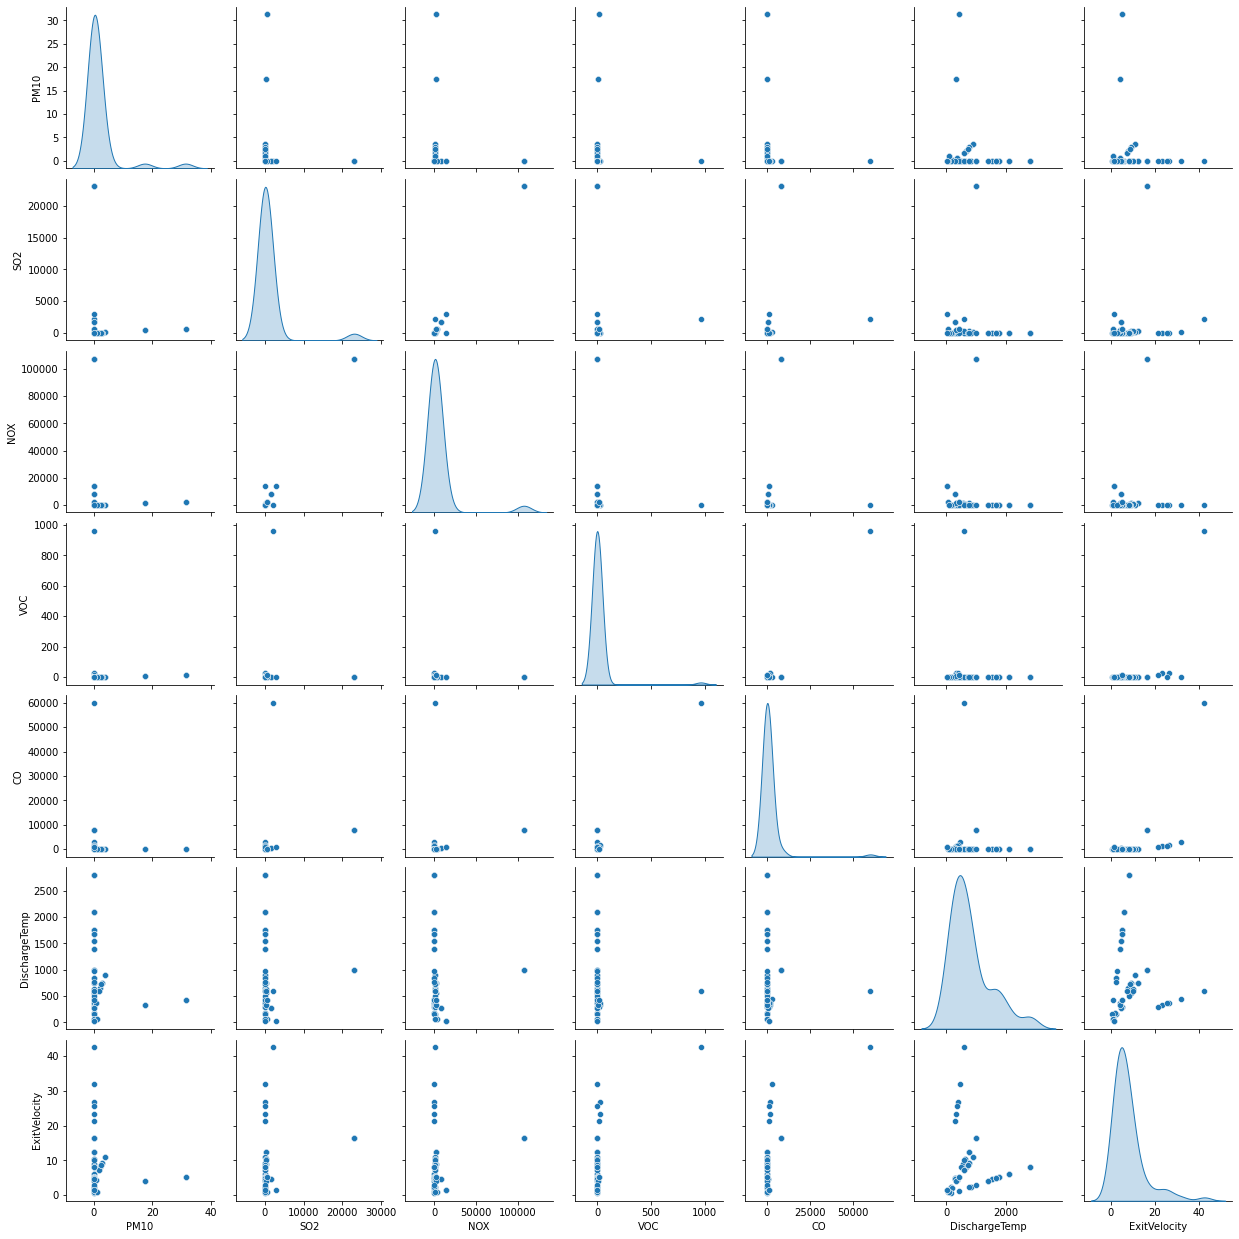

In [19]:
h = 1

X = dataX.loc[::h]
sns.pairplot(X[favCols], diag_kind='kde')

fname = filePath + '_pairplot_X'

plt.savefig(fname + '.svg')
plt.savefig(fname + '.png')

plt.show()


In [20]:
def plot_hist(x, xlabel, ylabel, label=None, colorNo=1, fname='plot_hist'):
    fig, ax = plt.subplots()

    for i in range(colorNo):
        color = next(ax._get_lines.prop_cycler)['color']

    # ax.hist(x, bins=25)
    ax.hist(x, 10,  
            facecolor=color,
            alpha=0.5, label=col)

    ax.set_xlabel(xlabel)
    _ = ax.set_ylabel(ylabel)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))

    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')

    plt.show()

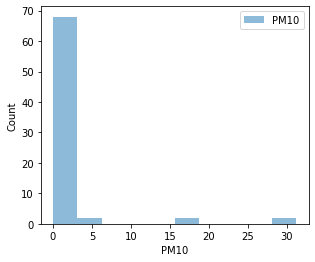

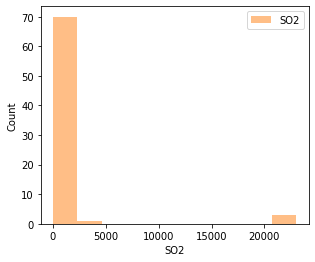

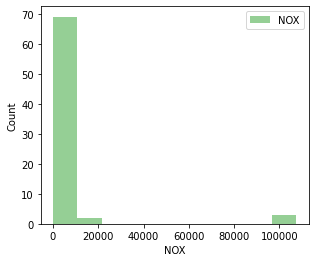

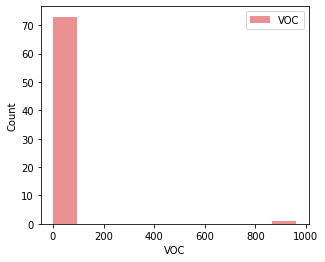

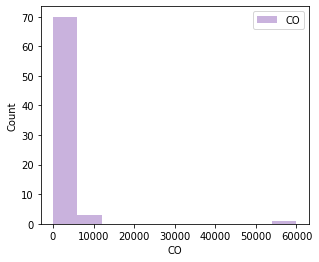

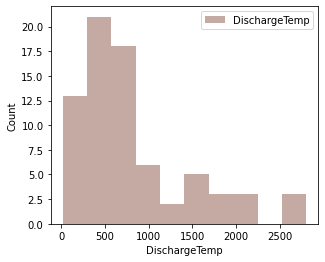

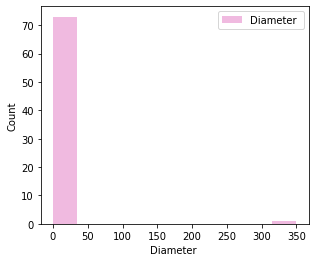

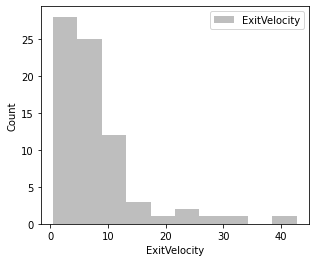

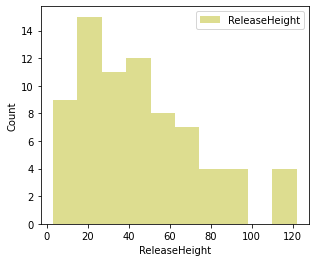

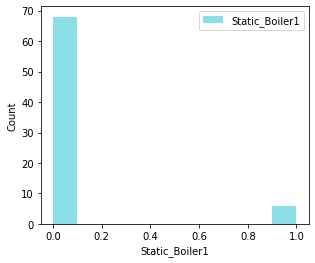

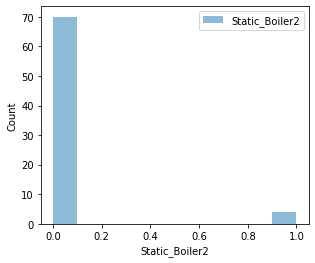

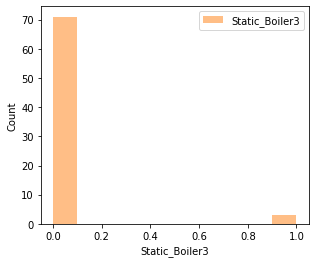

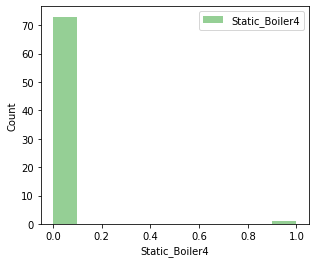

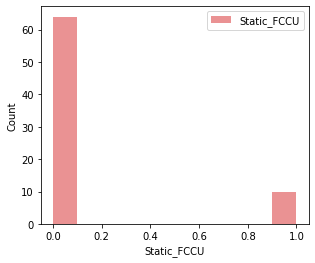

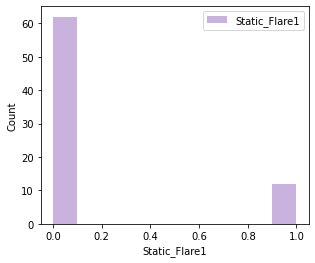

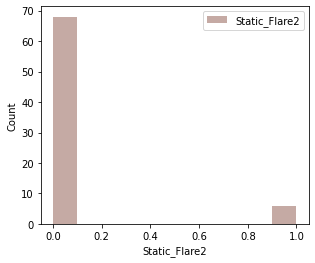

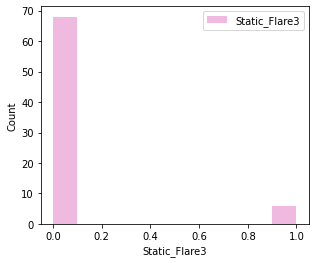

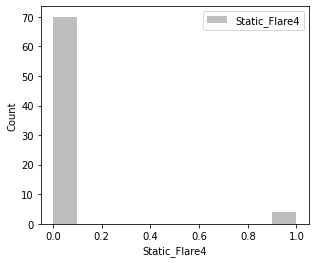

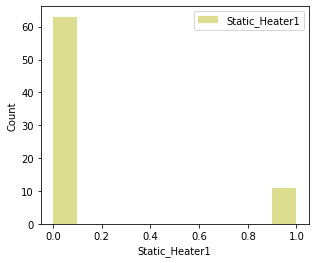

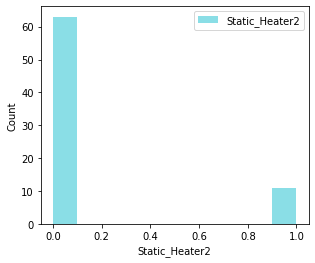

In [21]:

X = dataX.loc[::h]
colNames = X.columns

for i,col in enumerate(colNames):
    x = X[col]
    label=col

    xlabel = col
    ylabel = 'Count'

    fname = filePath + '_hist_' + col

    plot_hist(x, xlabel, ylabel, label, colorNo=i+1, fname=fname)

# fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)


In [22]:
X = dataX.loc[::h]
corr = X.corr()
corr

PM10       SO2       NOX       VOC        CO  \
PM10            1.000000 -0.047460 -0.052630 -0.013414 -0.050461   
SO2            -0.047460  1.000000  0.995720  0.023099  0.245002   
NOX            -0.052630  0.995720  1.000000 -0.031226  0.192601   
VOC            -0.013414  0.023099 -0.031226  1.000000  0.973069   
CO             -0.050461  0.245002  0.192601  0.973069  1.000000   
DischargeTemp  -0.152074  0.031767  0.024689 -0.043180 -0.037744   
Diameter       -0.040518  0.055999  0.054954 -0.007003  0.005143   
ExitVelocity   -0.097228  0.253487  0.214417  0.564278  0.628139   
ReleaseHeight  -0.149263  0.053585  0.029402  0.306397  0.321856   
Static_Boiler1 -0.089963 -0.045999 -0.013918 -0.039601 -0.042362   
Static_Boiler2 -0.072398  0.251318  0.250976 -0.031869  0.024777   
Static_Boiler3 -0.062255  0.304884  0.304492 -0.027404  0.041175   
Static_Boiler4 -0.035447  0.565914  0.565267 -0.015604  0.111256   
Static_FCCU    -0.119716 -0.044187 -0.044288 -0.052699 -0.062065   
Static_Flare1  -0.133241 -0.110661 -0.110698 -0.058561 -0.082697   
Static_Flare2  -0.089963 -0.074734 -0.074742 -0.039506 -0.055834   
Static_Flare3  -0.089963 -0.073759 -0.074712 -0.021727 -0.038459   
Static_Flare4  -0.072398 -0.028745 -0.059177  0.502248  0.515292   
Static_Heater1  0.299123 -0.093910 -0.095787 -0.045022 -0.076021   
Static_Heater2  0.299123 -0.093910 -0.095787 -0.045022 -0.076021   

                DischargeTemp  Diameter   ExitVelocity  ReleaseHeight  \
PM10                -0.152074  -0.040518     -0.097228      -0.149263   
SO2                  0.031767   0.055999      0.253487       0.053585   
NOX                  0.024689   0.054954      0.214417       0.029402   
VOC                 -0.043180  -0.007003      0.564278       0.306397   
CO                  -0.037744   0.005143      0.628139       0.321856   
DischargeTemp        1.000000  -0.115779      0.000052       0.820713   
Diameter            -0.115779   1.000000     -0.084052      -0.077357   
ExitVelocity         0.000052  -0.084052      1.000000       0.532445   
ReleaseHeight        0.820713  -0.077357      0.532445       1.000000   
Static_Boiler1      -0.234879  -0.042515     -0.139133      -0.277256   
Static_Boiler2      -0.047030  -0.024629      0.097001      -0.070227   
Static_Boiler3      -0.021529  -0.019909      0.110966      -0.037241   
Static_Boiler4       0.035122  -0.008171      0.134499       0.037140   
Static_FCCU         -0.257921   0.291343     -0.106736      -0.317260   
Static_Flare1        0.309469  -0.051630     -0.247716       0.143782   
Static_Flare2        0.473208  -0.026195     -0.096349       0.355214   
Static_Flare3        0.304858  -0.030112      0.144760       0.358534   
Static_Flare4       -0.123127  -0.018117      0.766540       0.368016   
Static_Heater1      -0.190441  -0.054899     -0.112611      -0.179853   
Static_Heater2      -0.190441  -0.054899     -0.112611      -0.179853   

                Static_Boiler1  Static_Boiler2  Static_Boiler3  \
PM10                 -0.089963       -0.072398       -0.062255   
SO2                  -0.045999        0.251318        0.304884   
NOX                  -0.013918        0.250976        0.304492   
VOC                  -0.039601       -0.031869       -0.027404   
CO                   -0.042362        0.024777        0.041175   
DischargeTemp        -0.234879       -0.047030       -0.021529   
Diameter             -0.042515       -0.024629       -0.019909   
ExitVelocity         -0.139133        0.097001        0.110966   
ReleaseHeight        -0.277256       -0.070227       -0.037241   
Static_Boiler1        1.000000       -0.071007       -0.061059   
Static_Boiler2       -0.071007        1.000000       -0.049137   
Static_Boiler3       -0.061059       -0.049137        1.000000   
Static_Boiler4       -0.034766       -0.027978       -0.024059   
Static_FCCU          -0.117417       -0.094491       -0.081253   
Static_Flare1        -0.130682       -0.105166       -0.090433   
S

In [23]:
nonCorrCols = list(corr[corr.isna().sum() > 1].index)
nonCorrCols

[]

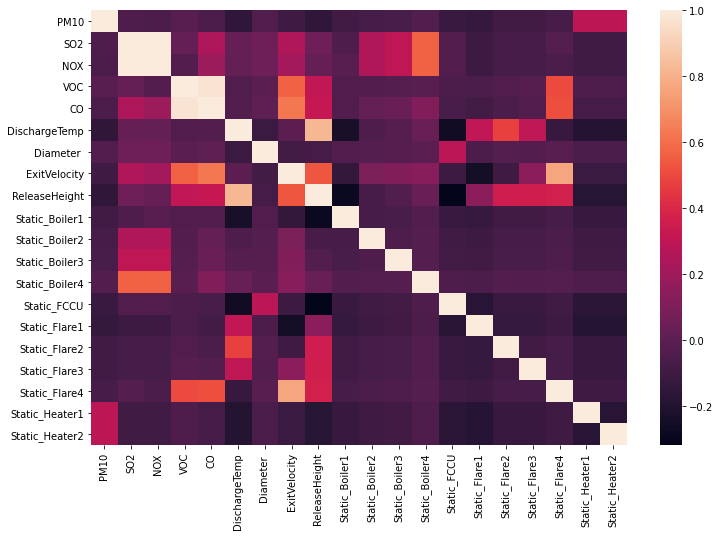

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            ax=ax)

fname = filePath + '_corr_all'

plt.savefig(fname + '.svg')
plt.savefig(fname + '.png')

plt.show()

In [25]:
correlatedCols = []

for c in dataX:
       for n in nonCorrCols:
              if c == n:
                     break
       else:
              correlatedCols.append(c)

              


correlatedCols 

['PM10',
 'SO2',
 'NOX',
 'VOC',
 'CO',
 'DischargeTemp',
 'Diameter ',
 'ExitVelocity',
 'ReleaseHeight',
 'Static_Boiler1',
 'Static_Boiler2',
 'Static_Boiler3',
 'Static_Boiler4',
 'Static_FCCU',
 'Static_Flare1',
 'Static_Flare2',
 'Static_Flare3',
 'Static_Flare4',
 'Static_Heater1',
 'Static_Heater2']

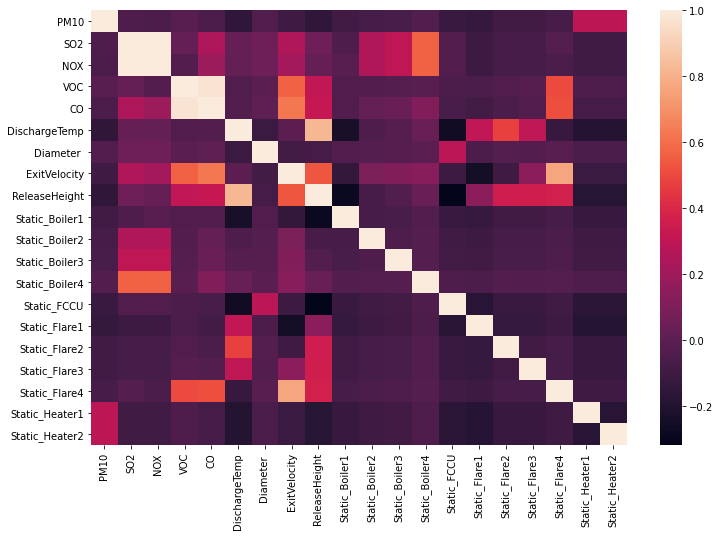

In [26]:

X = X[correlatedCols]
corr = X.corr()

fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            ax=ax)

fname = filePath + '_corr'

plt.savefig(fname + '.svg')
plt.savefig(fname + '.png')

plt.show()

In [27]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [28]:
def build_and_compile_model(norm, optimizer, loss, input_dim, metrics=None):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
      ])

    # model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    return model

In [29]:
def fit_evaluate(X_train, y_train, X_test, y_test, epochs=100):
    # fit
    history = model.fit(X_train, y_train, 
        epochs=epochs, 
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)


    loss_value, metrics_value = model.evaluate(X_test, y_test, verbose=0)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return history, loss_value, metrics_value, r2

In [30]:
def plot_loss(history, ylabel='Error [Y]', colorNo=1, text=None, fname='plot_loss'):
    fig, ax = plt.subplots(tight_layout=True)

    for i in range(colorNo):
        color = next(ax._get_lines.prop_cycler)['color']
    color2 = next(ax._get_lines.prop_cycler)['color']   

    ax.plot(history.history['loss'], label='loss', color=color)

    ax.plot(history.history['val_loss'], label='val_loss', color=color2)

    #   ax.ylim([0, 10])
    ax.set_xlabel('Epoch')
    ax.set_ylabel(ylabel)
    
    # title
    ax.set_title(text)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))

    ax.grid(True)

    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')

    plt.show()

In [31]:
def plot_model(x, y, sx, sy, xlabel, ylabel, colorNo=1, text=None, fname='plot_model'):
    fig, ax = plt.subplots(tight_layout=True)

    for i in range(colorNo):
        color = next(ax._get_lines.prop_cycler)['color']
    color2 = next(ax._get_lines.prop_cycler)['color']

    ax.scatter(sx, sy, label='Data', color=color)
    ax.plot(x, y, 
        # color='k', 
        color=color2,
        label='Predictions')

    ax.xlabel(xlabel)
    ax.ylabel(ylabel)
    
    # title
    ax.set_title(text)

    # # Shrink current axis by 20%
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))

    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')

    plt.show()


In [54]:
def plot_prediction(y, yPred, xlabel='True Values [Y]', ylabel='Predictions [Y]', lims=[0, 20], colorNo=1, text=None, fname='plot_prediction'):
    fig, ax = plt.subplots(
        # tight_layout=True
        )

    for i in range(colorNo):
        color = next(ax._get_lines.prop_cycler)['color']
    color2 = next(ax._get_lines.prop_cycler)['color']

    # ax = plt.axes(aspect='equal')
    ax.set_aspect(aspect='equal')

    # arr = text.split('\n')

    ax.scatter(y, yPred, color=color
                # , label=arr[0] 
                )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # lims = [0, 20]
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # label = arr[1].replace('; ','\n')
    _ = ax.plot(lims, lims, color=color2
                # , label=label
                )

    # title
    ax.set_title(text)

    # # Shrink current axis by 20%
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # # Put a legend to the right of the current axis
    # ax.legend(loc='best'
    #             , bbox_to_anchor=(1.005, 1)
    #             )


    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')

    plt.show()


In [55]:
def plot_error_hist(error, xlabel, ylabel, colorNo=1, text=None, fname='plot_error_hist'):
    fig, ax = plt.subplots(tight_layout=True)

    for i in range(colorNo):
        color = next(ax._get_lines.prop_cycler)['color']

    ax.hist(error, bins=25, facecolor=color)
    ax.set_xlabel(xlabel)
    _ = ax.set_ylabel(ylabel)

    # title
    ax.set_title(text)

    # # Shrink current axis by 20%
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # # Put a legend to the right of the current axis
    # ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))


    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')

    plt.show()

In [56]:
def get_lim0(x,y):
    x1,x2,y1,y2 = (min(x), max(x), min(y), max(y))
    llim = x1
    ulim = x2
    if x1 > y1:
        llim = y1

    if x2 > y2:
        ulim = y2

    (llim,ulim) = (np.floor(llim)-1, np.ceil(ulim)+1)

    h = ((ulim-llim)//3)*2

    llim = llim - h
    ulim = ulim + h

    return [llim, ulim]

In [57]:
def get_lim(x,y):
    x1,x2,y1,y2 = (min(x), max(x), min(y), max(y))
    llim = x1
    ulim = x2
    if x1 > y1:
        llim = y1

    if x2 < y2:
        ulim = y2

    (llim,ulim) = (np.floor(llim)-1, np.ceil(ulim)+1)

    h = int((ulim-llim)*(1/5))

    llim = llim - h
    ulim = ulim + h

    return [llim, ulim]

In [58]:
def simulatePrediction(model, label, X_test, y_test, colorNo=1, text=None, fname='plot_prediction'):
    test_predictions = model.predict(X_test).flatten()

    x = y_test
    y = test_predictions

    xlabel = f'True Values [{label}]'
    ylabel = f'Predictions [{label}]'

    lims = get_lim(x,y)

    plot_prediction(x, y, xlabel, ylabel, lims, colorNo, text, fname)

    return test_predictions

In [59]:
def simulateError(label, test_predictions, y_test, colorNo=1, text=None, fname='plot_error_hist'):
    error = test_predictions - y_test
    xlabel = f'Prediction Error [{label}]'
    ylabel = 'Count'

    plot_error_hist(error, xlabel, ylabel, colorNo, text, fname)


In [60]:
def getBestR2(test_results):
    # get best r2
    o=-1
    i =0
    key=''
    value=0
    r2=0
    for k,v in test_results.items():
        if i == 0:
            r2 = v[o]
            key = k
            value = v
            i += 1
            continue

        i += 1
        # if v[o] < 0:
        #     continue

        if v[o] > r2:
            r2 = v[o]
            key = k
            value = v   

    return key  

In [61]:
def getBestMSE(test_results):
    # get best r2
    o=-2
    i =0
    key=''
    value=0
    r2=0
    for k,v in test_results.items():
        if i == 0:
            r2 = v[o]
            key = k
            value = v
            i += 1
            continue

        i += 1
        # if v[o] < 0:
        #     continue

        if v[o] < r2:
            r2 = v[o]
            key = k
            value = v   

    return key  

In [62]:
def getBestMAE(test_results):
    # get best r2
    o=-3
    i =0
    key=''
    value=0
    r2=0
    for k,v in test_results.items():
        if i == 0:
            r2 = v[o]
            key = k
            value = v
            i += 1
            continue

        i += 1
        # if v[o] < 0:
        #     continue

        if v[o] < r2:
            r2 = v[o]
            key = k
            value = v   

    return key  

In [63]:
def simulateBest(model, history, tgt, X_test, y_test, colorNo, text, simKey, filePrefix):
    # loss
    fname = filePrefix + '_' + simKey + '_1loss'
    plot_loss(history, f'Error [{tgt}]', colorNo=colorNo, text=text, fname=fname)
    # prediction
    fname = filePrefix + '_' + simKey + '_2pred'
    test_predictions = simulatePrediction(model, tgt, X_test, y_test, colorNo=colorNo, text=text, fname=fname)
    # error
    fname = filePrefix + '_' + simKey + '_3err'
    simulateError(tgt, test_predictions, y_test, colorNo=colorNo, text=text, fname=fname)


In [64]:
def simulateR2(test_results, key, tgt, X_test, y_test, colorNo, filePrefix):
    model, history, loss_value, metrics_value, r2 = test_results[key]

    simKey = key + '_r2'
    text = f'optimizer={optKey}\n$R^2$={r2:.2f}; MAE={loss_value:.4f}; MSE={metrics_value:.4f}'

    simulateBest(model, history, tgt, X_test, y_test, colorNo, text, simKey, filePrefix)


In [65]:
def simulateMAE(test_results, key, tgt, X_test, y_test, colorNo, filePrefix):
    model, history, loss_value, metrics_value, r2 = test_results[key]

    simKey = key + '_mae'
    text = f'optimizer={optKey}\nMAE={loss_value:.4f}; MSE={metrics_value:.4f}; $R^2$={r2:.2f}'

    simulateBest(model, history, tgt, X_test, y_test, colorNo, text, simKey, filePrefix)


In [66]:
def simulateMSE(test_results, key, tgt, X_test, y_test, colorNo, filePrefix):
    model, history, loss_value, metrics_value, r2 = test_results[key]

    simKey = key + '_mse'
    text = f'optimizer={optKey}\nMSE={metrics_value:.4f}; MAE={loss_value:.4f}; $R^2$={r2:.2f}'

    simulateBest(model, history, tgt, X_test, y_test, colorNo, text, simKey, filePrefix)


+PM10===============================================================
simulate... o:RMSprop | l:mae | m:mse | e:100...
PM10 busy.. . 1/5WARNING:tensorflow:8 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f83e8055ca0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f84

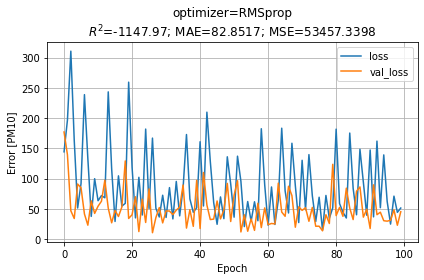

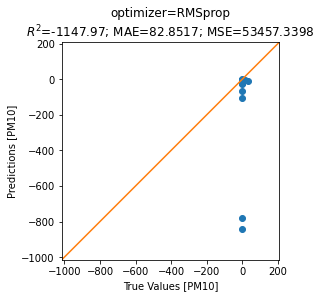

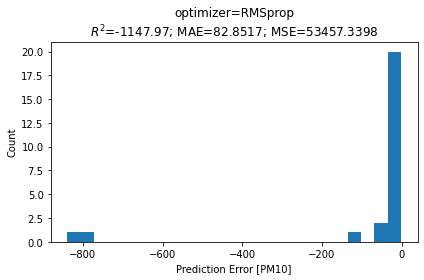

best mae...


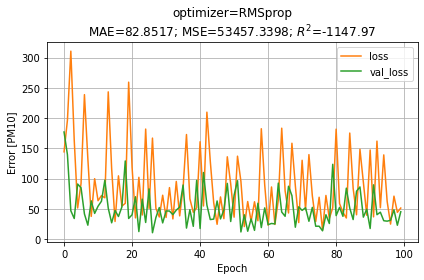

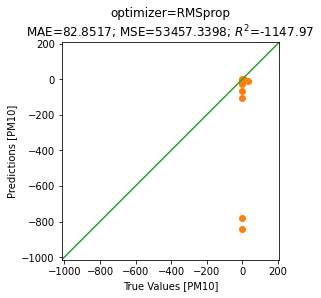

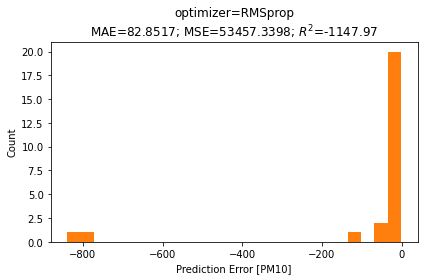

best mse...


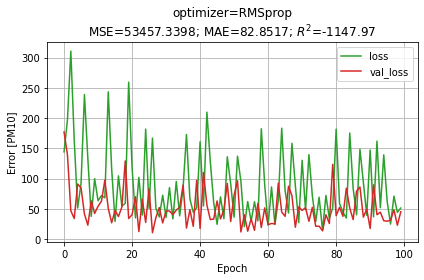

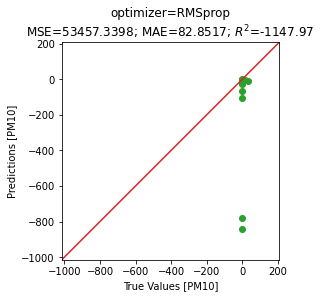

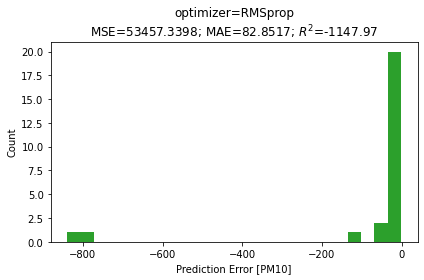


-PM10===============================================================
PM10 done.
simulate... o:Adam | l:mae | m:mse | e:100...
PM10 busy.. . 1/5WARNING:tensorflow:8 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f83e8090280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function 

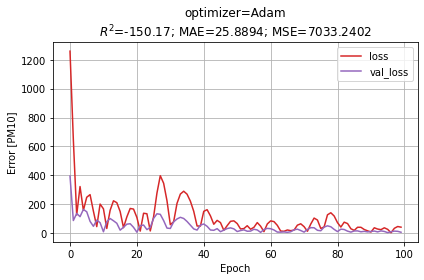

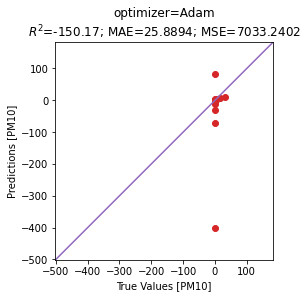

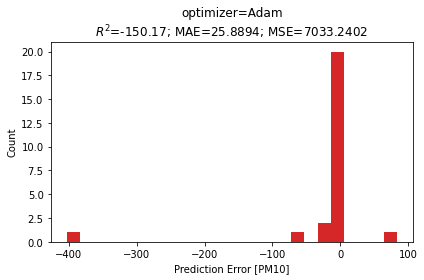

best mae...


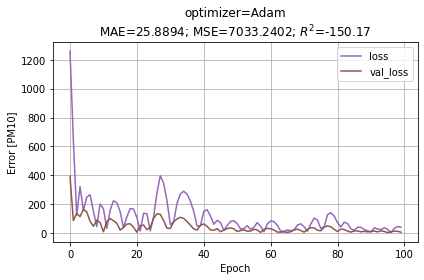

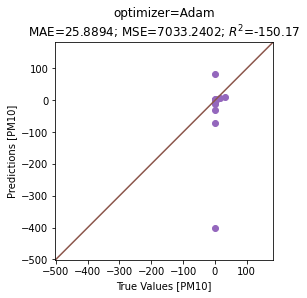

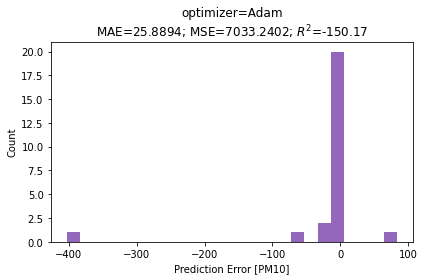

best mse...


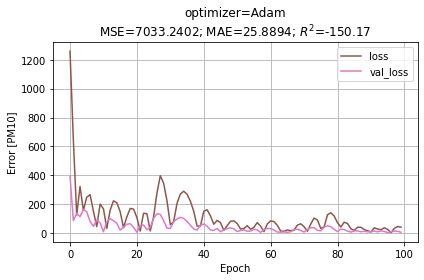

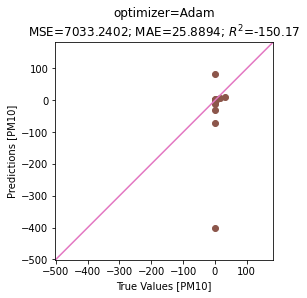

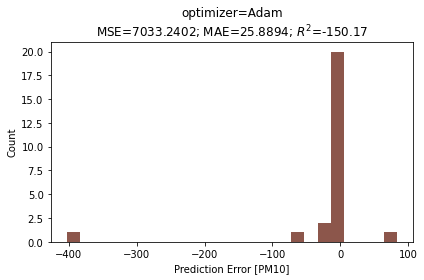


-PM10===============================================================
PM10 done.
+SO2===============================================================
simulate... o:RMSprop | l:mae | m:mse | e:100...
SO2 busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f83e8997280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 cal

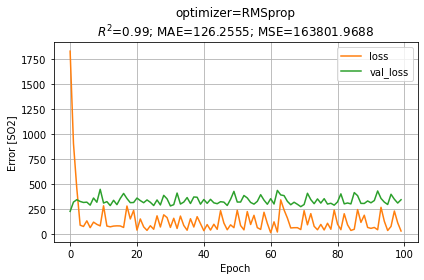

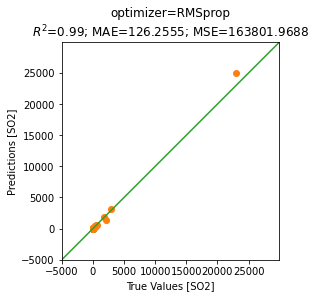

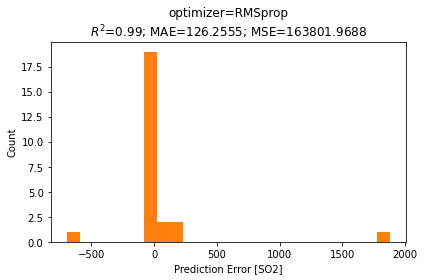

best mae...


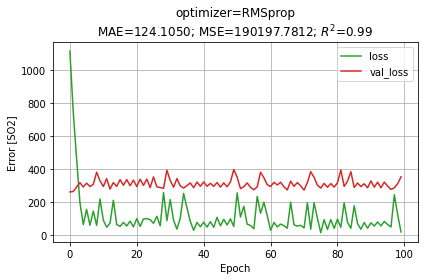

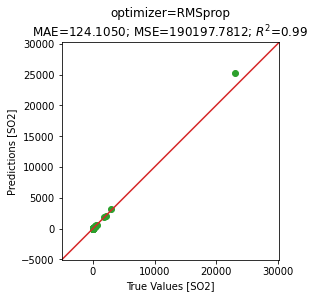

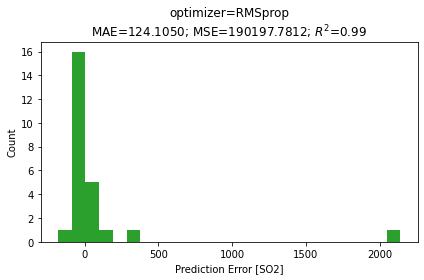

best mse...


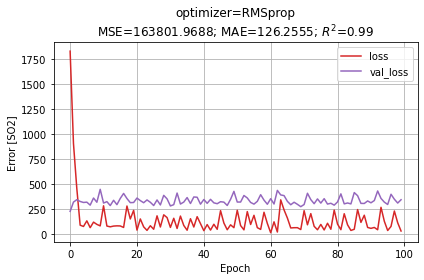

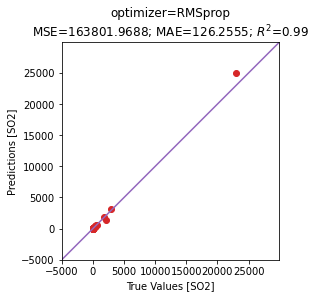

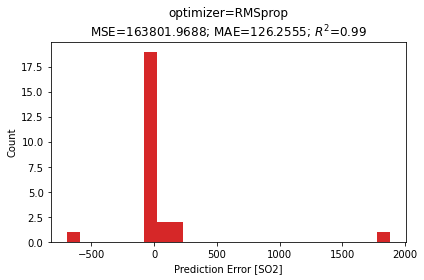


-SO2===============================================================
SO2 done.
simulate... o:Adam | l:mae | m:mse | e:100...
SO2 busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f83e83e3e50> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 

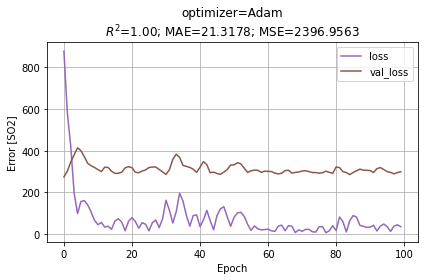

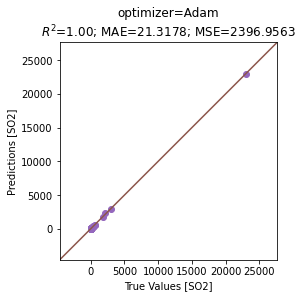

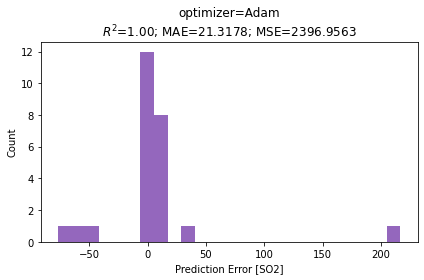

best mae...


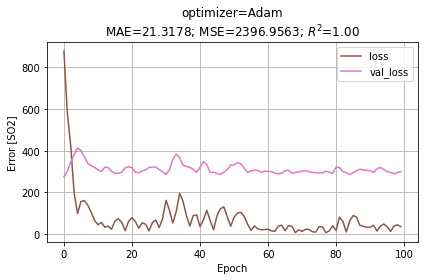

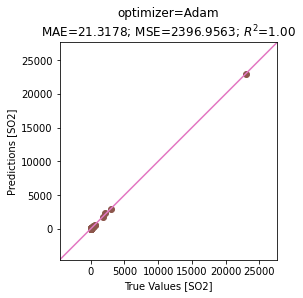

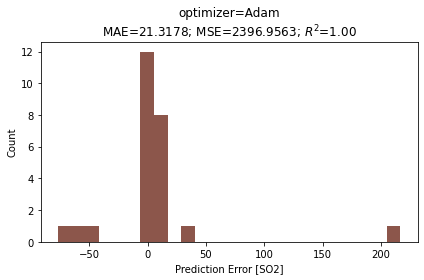

best mse...


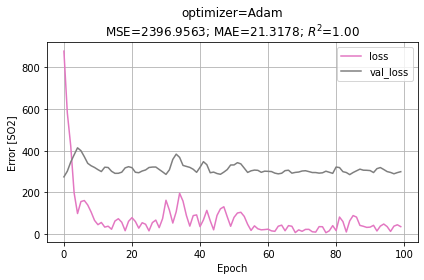

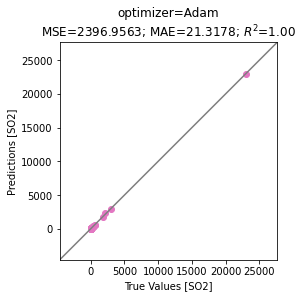

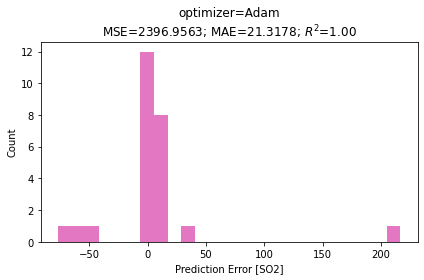


-SO2===============================================================
SO2 done.
+NOX===============================================================
simulate... o:RMSprop | l:mae | m:mse | e:100...
NOX busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f838d971700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 calls

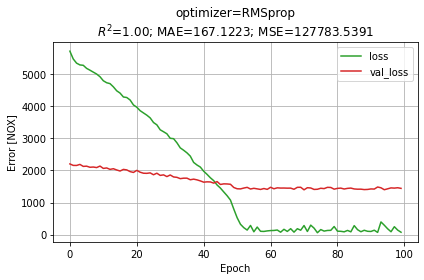

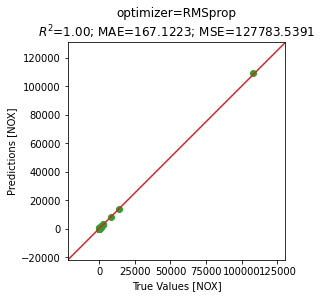

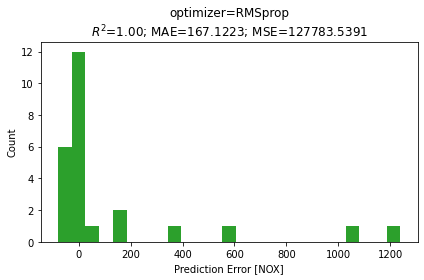

best mae...


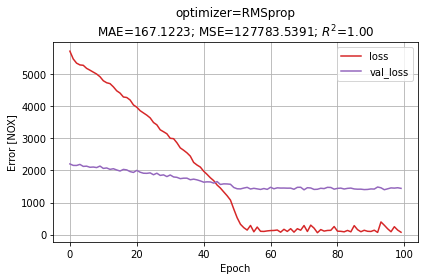

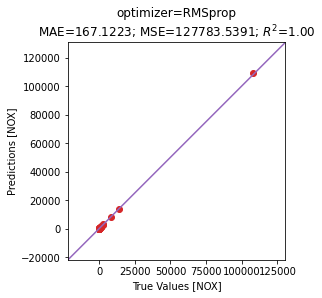

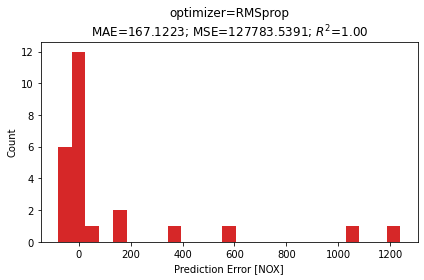

best mse...


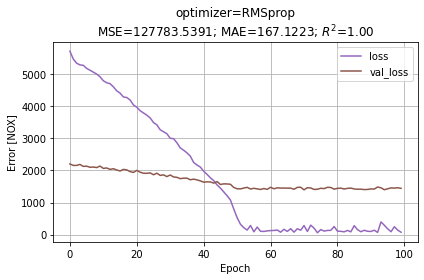

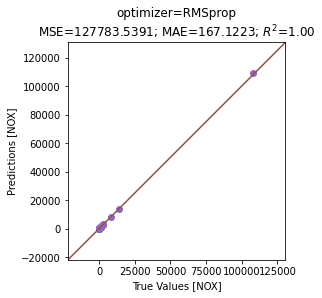

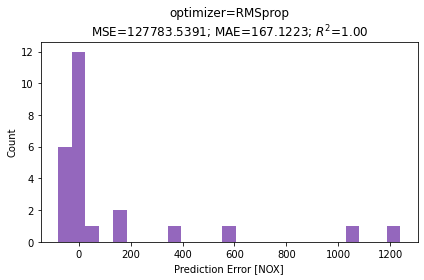


-NOX===============================================================
NOX done.
simulate... o:Adam | l:mae | m:mse | e:100...
NOX busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f8379b585e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 

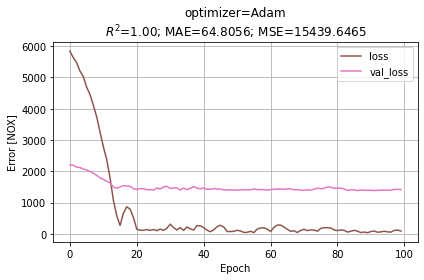

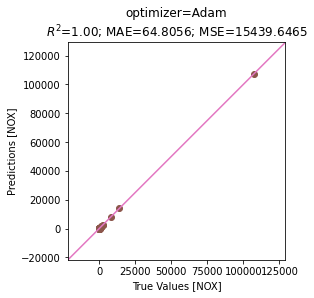

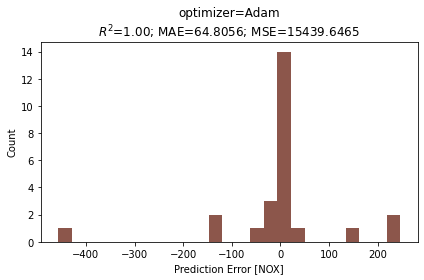

best mae...


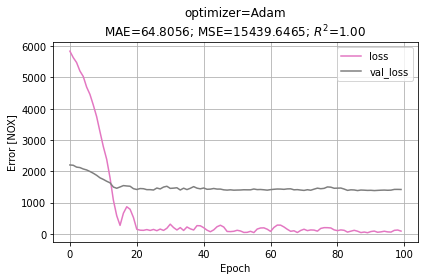

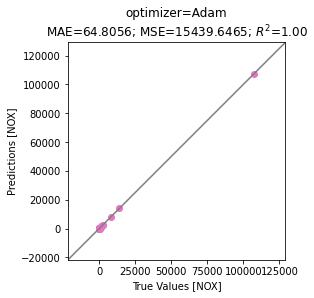

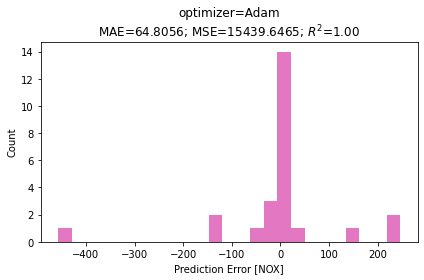

best mse...


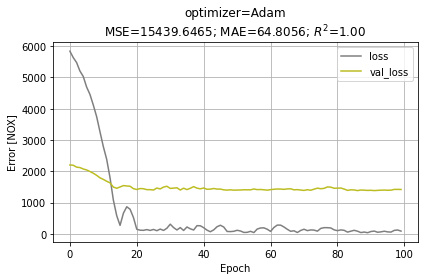

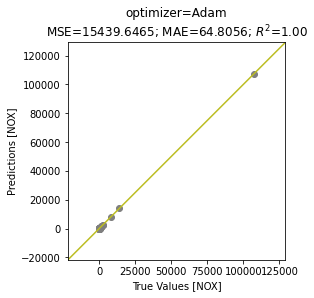

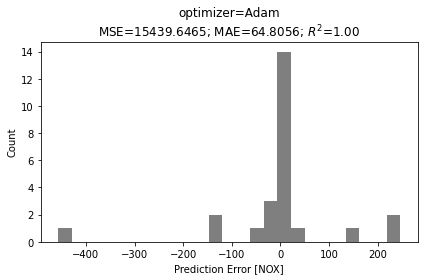


-NOX===============================================================
NOX done.
+VOC===============================================================
simulate... o:RMSprop | l:mae | m:mse | e:100...
VOC busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f8375eba790> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 calls

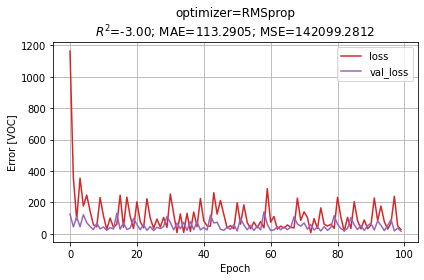

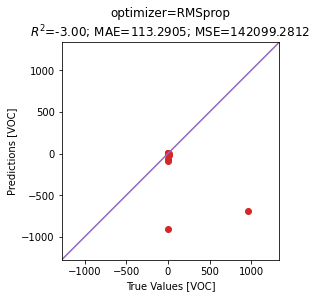

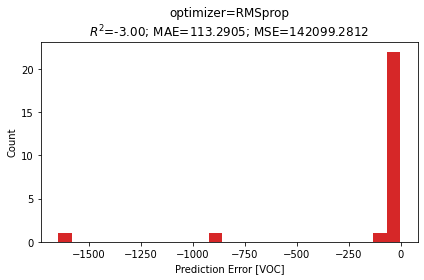

best mae...


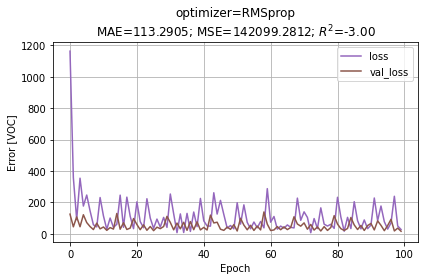

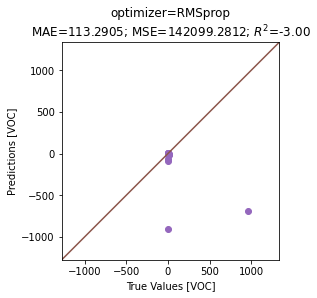

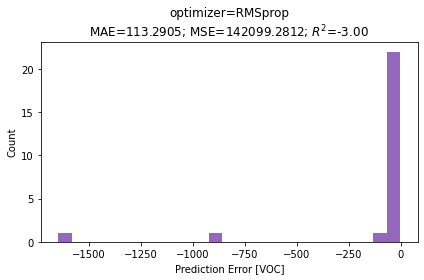

best mse...


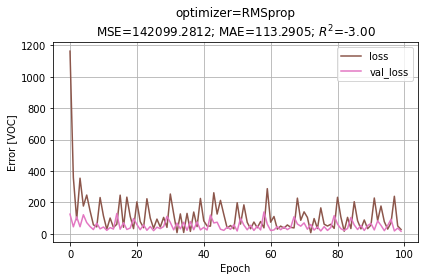

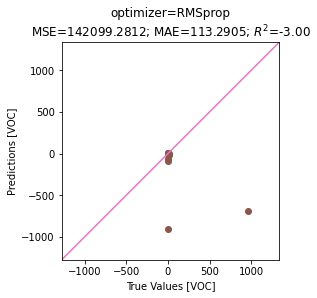

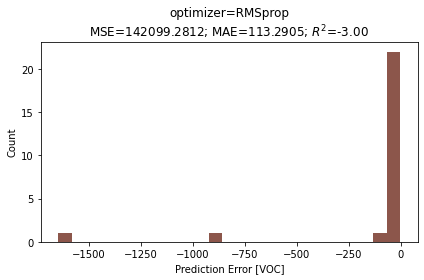


-VOC===============================================================
VOC done.
simulate... o:Adam | l:mae | m:mse | e:100...
VOC busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f83e9743e50> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 

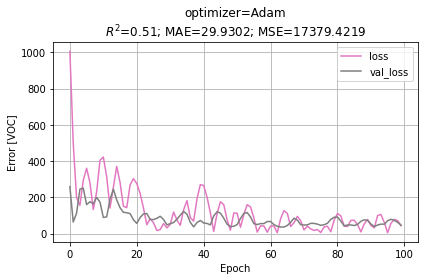

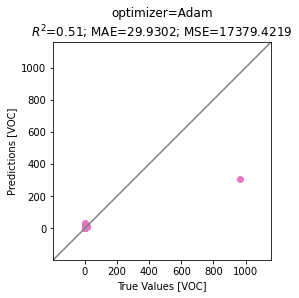

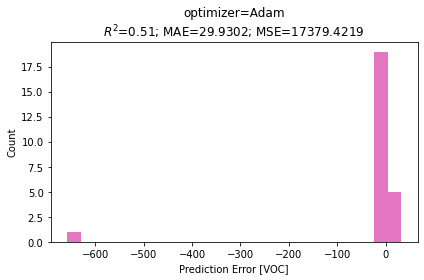

best mae...


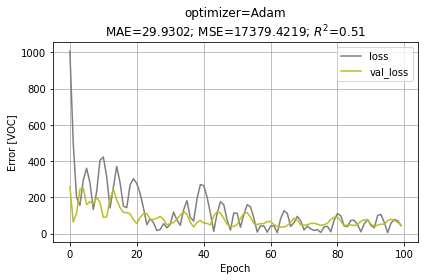

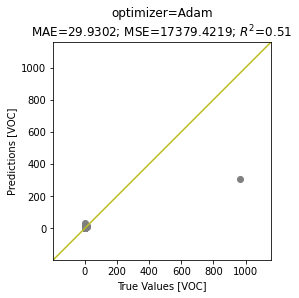

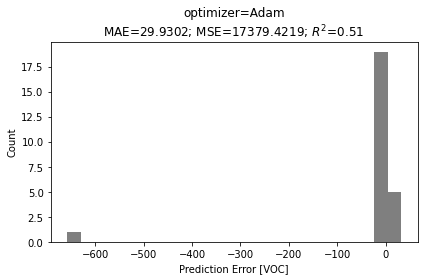

best mse...


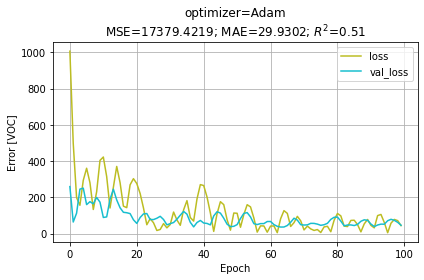

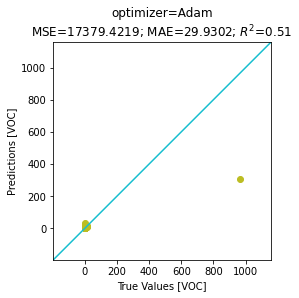

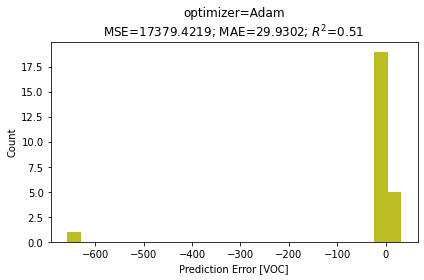


-VOC===============================================================
VOC done.
+CO===============================================================
simulate... o:RMSprop | l:mae | m:mse | e:100...
CO busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f83616aed30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 calls t

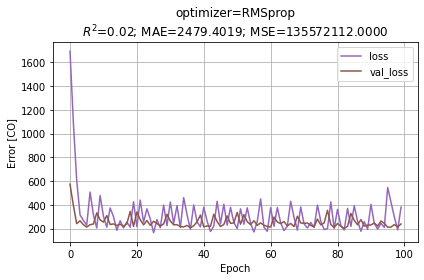

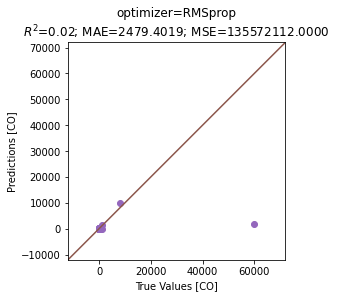

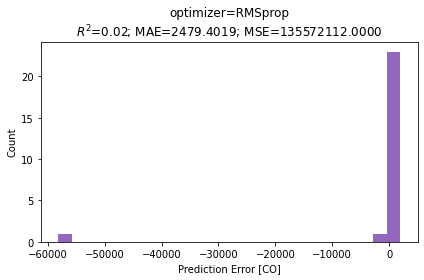

best mae...


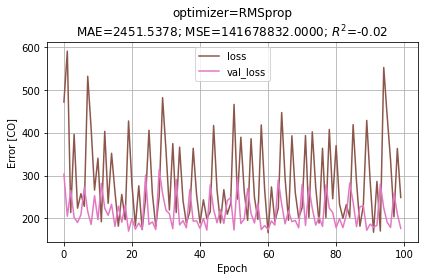

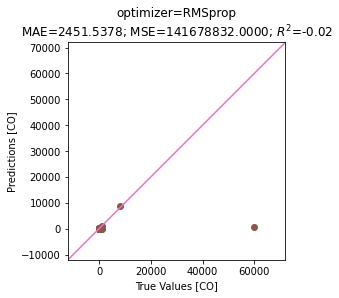

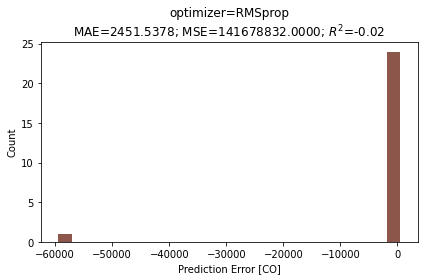

best mse...


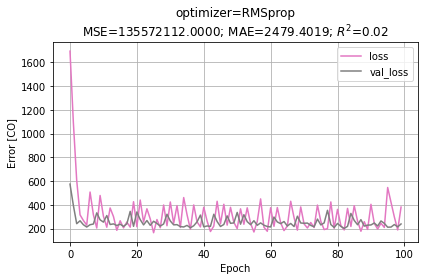

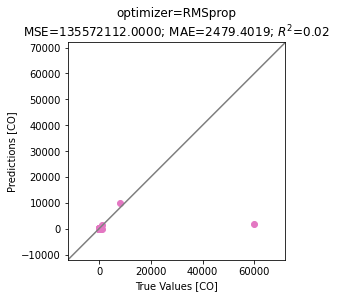

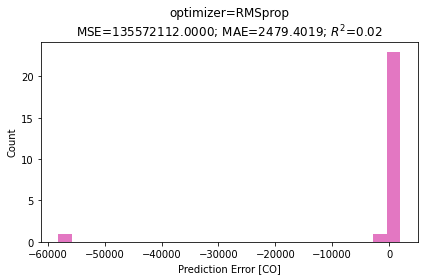


-CO===============================================================
CO done.
simulate... o:Adam | l:mae | m:mse | e:100...
CO busy.. . 1/5WARNING:tensorflow:7 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f836a98b430> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 . 2/5WARNING:tensorflow:8 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7

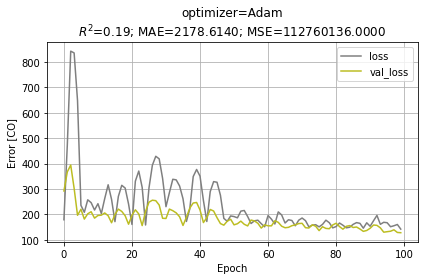

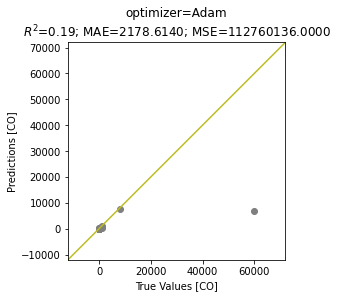

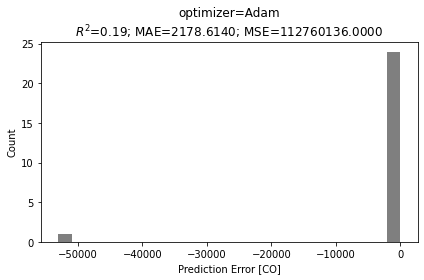

best mae...


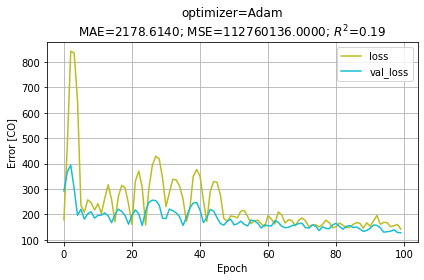

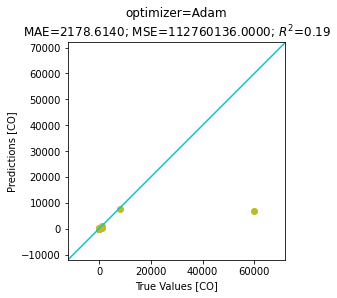

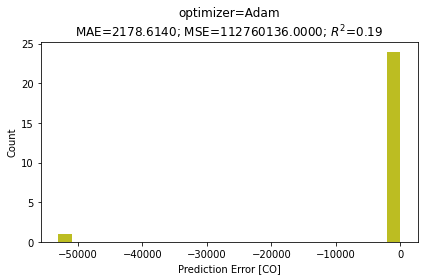

best mse...


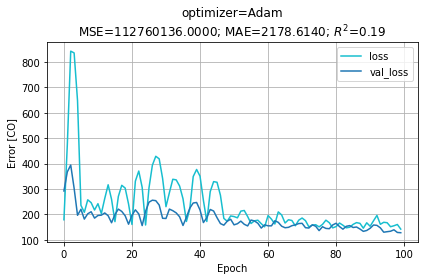

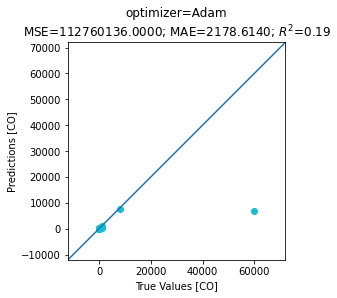

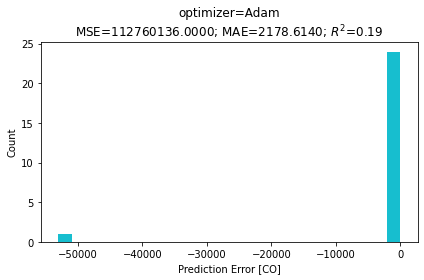


-CO===============================================================
CO done.


In [67]:
# 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import datetime

dt = datetime.datetime.now()

uniqueId = dt.strftime("%Y%m%d%H%M%S")

h = 1

filePrefix = filePath + '_' + uniqueId

test_results_all = {}
testData = {}


# targetCols = ['PM10']
targetCols = outFeatures

for t,tgt in enumerate(targetCols):
    colorNo = t

    print(f'+{tgt}===============================================================')

    X = dataX.copy()
    X = X.loc[::h]

    #  Isolate target tgts
    y = X[tgt].to_numpy()

    # Isolate data
    X = X.drop(tgt, axis=1).to_numpy()

    # Split the data up in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # 
    testData[tgt] = (X_test, y_test)


    # train
    M,N = X_train.shape

    # model
    normalizer = preprocessing.Normalization(input_dim=N)
    # normalizer.adapt(np.array(X_train))

    # optimizers
    learning_rate = 0.001

    dictOpt ={}
    dictOpt['RMSprop'] = keras.optimizers.RMSprop(lr=learning_rate)
    dictOpt['Adam'] =  tf.optimizers.Adam(learning_rate=learning_rate)

    optKey = 'Adam'
    optimizer = dictOpt[optKey]


    for optKey, optimizer in dictOpt.items():
        test_results = {}

        # loss
        loss='mae'

        # metrics
        metrics=['mse']

        # epochs
        epochs=100

        print(f'simulate... o:{optKey} | l:{loss} | m:{metrics[0]} | e:{epochs}...') 

        print(f'{tgt} busy..', end = "")  

        r2Limit = 1
        maxIteration = 5

        # model = build_and_compile_model(normalizer, optimizer, loss, N, metrics)

        for i in range(maxIteration):
            model = build_and_compile_model(normalizer, optimizer, loss, N, metrics)
            # print(model.summary())

            print(f' . {i+1}/{maxIteration}', end = "")  
            history, loss_value, metrics_value, r2 = fit_evaluate(X_train, y_train, X_test, y_test, epochs )    

            simKey = f'{tgt}_{optKey}_{loss}_{epochs}_{i+1}'
            test_results[simKey] = model, history, loss_value, metrics_value, r2

        # best r2
        print('\nbest r2...')  
        # get best r2
        key = getBestR2(test_results)
        colorNo += 1
        simulateR2(test_results, key, tgt, X_test, y_test, colorNo, filePrefix)
        
        # best mae
        print('best mae...')  
        # get best mae
        key1 = getBestMAE(test_results)
        colorNo += 1
        simulateMAE(test_results, key1, tgt, X_test, y_test, colorNo, filePrefix)

        # best mse
        print('best mse...')  
        # get best mse
        key2 = getBestMSE(test_results)
        colorNo += 1
        simulateMSE(test_results, key2, tgt, X_test, y_test, colorNo, filePrefix)


        # save
        simKey = key + '_r2'
        test_results[simKey] = test_results[key]
        simKey = key1 + '_mae'
        test_results[simKey] = test_results[key1]
        simKey = key2 + '_mse'
        test_results[simKey] = test_results[key2]


        for k,v in test_results.items():
            test_results_all[k] = v
        
        print()
        print(f'-{tgt}===============================================================')
        print(f'{tgt} done.')  

In [68]:
d = [{'Model':k, 'Component':k.split('_')[0], 'Optimizer':k.split('_')[1],'Metric': k.split('_')[-1], 'MAE':v[-3],'MSE':v[-2],'R2':v[-1] } for k,v in test_results_all.items() ]
dfTestResults = pd.DataFrame(d)
dfTestResults


Model Component Optimizer Metric          MAE  \
0   PM10_RMSprop_mae_100_1      PM10   RMSprop      1   171.221130   
1   PM10_RMSprop_mae_100_2      PM10   RMSprop      2   274.932098   
2   PM10_RMSprop_mae_100_3      PM10   RMSprop      3    82.851700   
3   PM10_RMSprop_mae_100_4      PM10   RMSprop      4   129.387268   
4   PM10_RMSprop_mae_100_5      PM10   RMSprop      5    92.867538   
..                     ...       ...       ...    ...          ...   
75       CO_Adam_mae_100_4        CO      Adam      4  2471.413330   
76       CO_Adam_mae_100_5        CO      Adam      5  2178.614014   
77    CO_Adam_mae_100_5_r2        CO      Adam     r2  2178.614014   
78   CO_Adam_mae_100_5_mae        CO      Adam    mae  2178.614014   
79   CO_Adam_mae_100_5_mse        CO      Adam    mse  2178.614014   

             MSE            R2  
0   3.741898e+05  -8041.524347  
1   7.352320e+05 -15801.478249  
2   5.345734e+04  -1147.967884  
3   1.709772e+05  -3673.840803  
4   9.268296e+04  -1991.049494  
..           ...           ...  
75  1.409832e+08     -0.017996  
76  1.127601e+08      0.185794  
77  1.127601e+08      0.185794  
78  1.127601e+08      0.185794  
79  1.127601e+08      0.185794  

[80 rows x 7 columns]

In [69]:
fname = filePrefix + '__out.xlsx'

with pd.ExcelWriter(fname, engine='openpyxl') as writer:
    sheet = 'result'
    dfTestResults.to_excel(writer, sheet_name=sheet)

    tgt = ''
    for k,v in test_results_all.items():    
        dfH = pd.DataFrame(v[1].history)
        sheet = 'H_' + k
        dfH.to_excel(writer, sheet_name=sheet)

        # 
        tgt0 = k.split('_')[0]

        if tgt0 != tgt:
            tgt = tgt0
            (X_test, y_test) = testData[tgt]

            dfH = pd.DataFrame(X_test)
            sheet = 'X_' + k
            dfH.to_excel(writer, sheet_name=sheet)

        # 
        model = v[0]
        test_predictions = model.predict(X_test).flatten()
        dfH = pd.DataFrame({'YTest':y_test, 'YPred':test_predictions})
        sheet = 'P_' + k
        dfH.to_excel(writer, sheet_name=sheet)




In [76]:
dfTestResults.head(10)

Model Component Optimizer Metric         MAE  \
0      PM10_RMSprop_mae_100_1      PM10   RMSprop      1  171.221130   
1      PM10_RMSprop_mae_100_2      PM10   RMSprop      2  274.932098   
2      PM10_RMSprop_mae_100_3      PM10   RMSprop      3   82.851700   
3      PM10_RMSprop_mae_100_4      PM10   RMSprop      4  129.387268   
4      PM10_RMSprop_mae_100_5      PM10   RMSprop      5   92.867538   
5   PM10_RMSprop_mae_100_3_r2      PM10   RMSprop     r2   82.851700   
6  PM10_RMSprop_mae_100_3_mae      PM10   RMSprop    mae   82.851700   
7  PM10_RMSprop_mae_100_3_mse      PM10   RMSprop    mse   82.851700   
8         PM10_Adam_mae_100_1      PM10      Adam      1   95.654434   
9         PM10_Adam_mae_100_2      PM10      Adam      2   87.255852   

             MSE            R2  
0  374189.843750  -8041.524347  
1  735232.000000 -15801.478249  
2   53457.339844  -1147.967884  
3  170977.234375  -3673.840803  
4   92682.960938  -1991.049494  
5   53457.339844  -1147.967884  
6   53457.339844  -1147.967884  
7   53457.339844  -1147.967884  
8   92686.093750  -1991.120105  
9   96314.656250  -2069.109211

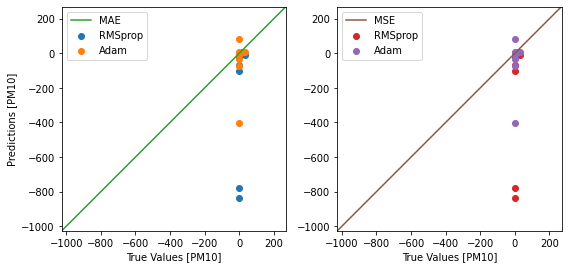

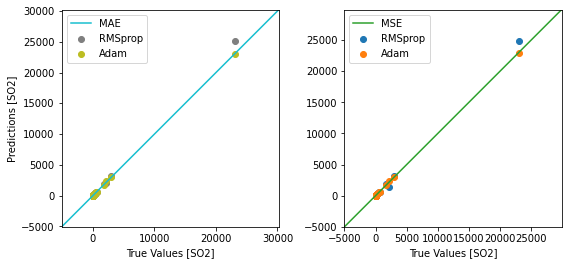

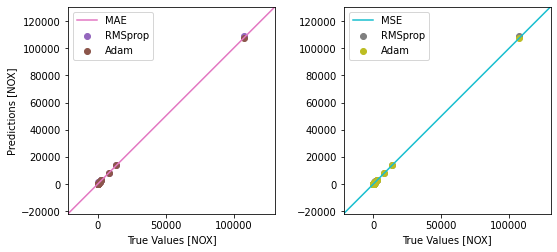

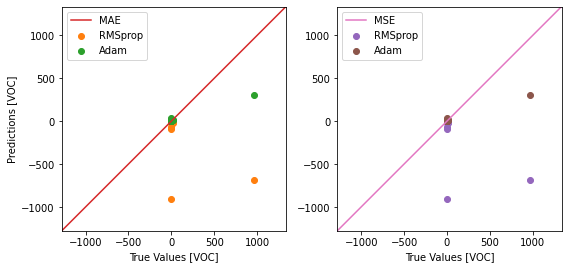

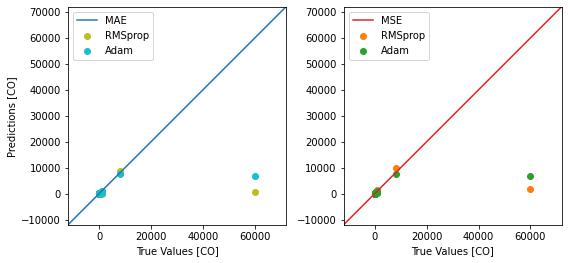

In [71]:
colorNo = 0
prows, pcols = 1,2

for tgt in targetCols:
    fig, axx = plt.subplots(prows, pcols, figsize=(8,4), 
            tight_layout=True
            )

    fname = f'{filePrefix}_{tgt}_{prows}{pcols}'

    colorNo += 1
    for j,mtc in enumerate(['mae', 
                'mse', 
                #  'r2'
                #  , 'mse'
                ]):
        
        a = j//2
        b = j%2

        # print(a,b)

        df = dfTestResults
        dfw = df[(df['Component'] == tgt) & (df['Metric'] == mtc)]

        (X_test, y_test) = testData[tgt]

        M,N = dfw.shape

        # ax = axx[a,b]
        ax = axx[j]
        ax.set_aspect('equal')        

        for i in range(colorNo):
            color = next(ax._get_lines.prop_cycler)['color']

        lims1 = (0,0)

        for i in range(M):
            k = dfw['Model'].iloc[i]
            label = dfw['Optimizer'].iloc[i]

            v = test_results_all[k]
            model = v[0]
            yPred = model.predict(X_test).flatten()
            
            colorNo += 1
            ax.scatter(y_test, yPred, label=label, color = color)
            color = next(ax._get_lines.prop_cycler)['color']

            (x1,x2),(y1,y2) = (min(y_test), max(y_test)), (min(yPred), max(yPred))
            # print((x1,x2),(y1,y2))

            if x1 > y1:
                x1 = y1
            if x2 < y2:
                x2 = y2

            lims0 = (x1, x2)

            # print(lims0)
            (x1,x2),(y1,y2) = lims1, lims0
            if x1 > y1:
                x1 = y1
            if x2 < y2:
                x2 = y2
            lims1 = (x1, x2)
            # print(lims1)

        lims = get_lim([0,0], lims1)
        # print(lims)
        
        if mtc =='r2':
            label = '$R^2$'
        else:
            label = mtc.upper()
        colorNo += 1
        _ = ax.plot(lims, lims, color = color, label=label)

        ax.set_xlim(lims)
        ax.set_ylim(lims)

        xlabel=f'True Values [{tgt}]'
        ylabel=f'Predictions [{tgt}]'

        if j >= ((prows*pcols)-pcols):
            ax.set_xlabel(xlabel)

        if (j+1)%2 == 1:
            ax.set_ylabel(ylabel)

        # # Shrink current axis by 20%
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))

        # plt.savefig(fname + '.svg')
        # plt.savefig(fname + '.png')

    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')
    plt.show()


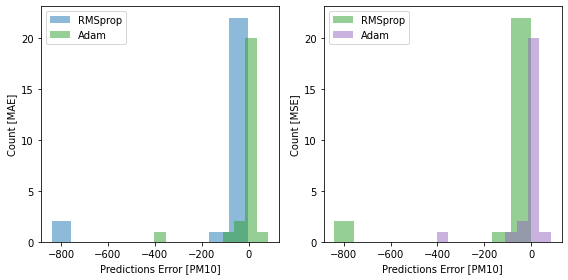

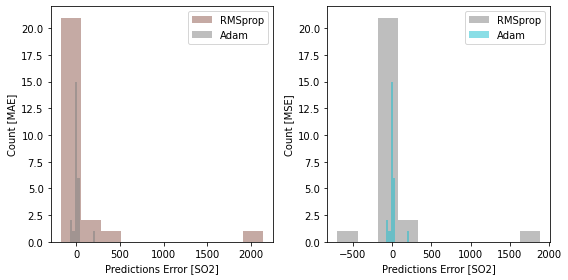

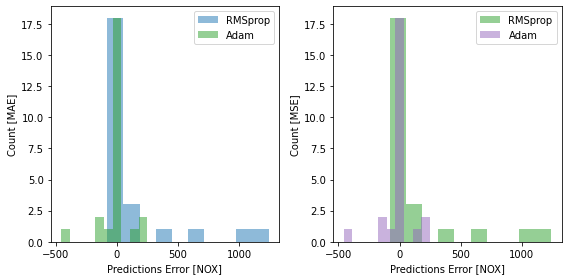

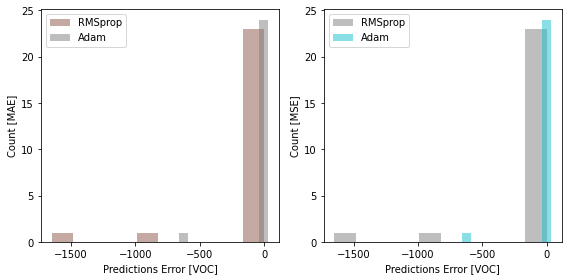

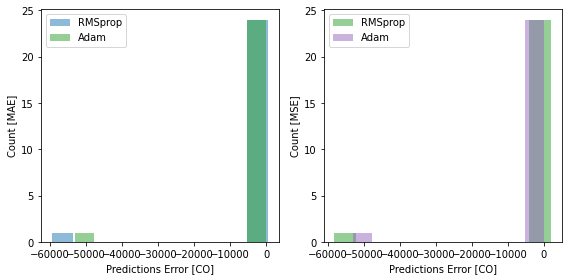

In [72]:
# histogram

colorNo = 0
prows, pcols = 1,2

for tgt in targetCols:
    fig, axx = plt.subplots(prows, pcols, figsize=(8,4), 
            tight_layout=True
            )

    fname = f'{filePrefix}_{tgt}_err{prows}{pcols}'

    colorNo += 1
    for j,mtc in enumerate(['mae', 
                'mse', 
                #  'r2'
                #  , 'mse'
                ]):
        
        a = j//2
        b = j%2

        # print(a,b)

        df = dfTestResults
        dfw = df[(df['Component'] == tgt) & (df['Metric'] == mtc)]

        (X_test, y_test) = testData[tgt]

        M,N = dfw.shape

        # ax = axx[a,b]
        ax = axx[j]
        # ax.set_aspect('equal')

        for i in range(colorNo):
            color = next(ax._get_lines.prop_cycler)['color']

        lims1 = (0,0)

        for i in range(M):
            k = dfw['Model'].iloc[i]
            label = dfw['Optimizer'].iloc[i]

            v = test_results_all[k]
            model = v[0]
            yPred = model.predict(X_test).flatten()

            error = yPred - y_test

            ax.hist(error, 
                    # bins=25, 
                    facecolor=color, alpha=0.5, label=label)
            colorNo += 1
            color = next(ax._get_lines.prop_cycler)['color']


        if mtc =='r2':
            label = '$R^2$'
        else:
            label = mtc.upper()

        xlabel=f'Predictions Error [{tgt}]'
        ylabel=f'Count [{label}]'

        if j >= ((prows*pcols)-pcols):
            ax.set_xlabel(xlabel)

        if True or (j+1)%2 == 1:
            ax.set_ylabel(ylabel)

        # # Shrink current axis by 20%
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))

        # plt.savefig(fname + '.svg')
        # plt.savefig(fname + '.png')

    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')
    plt.show()


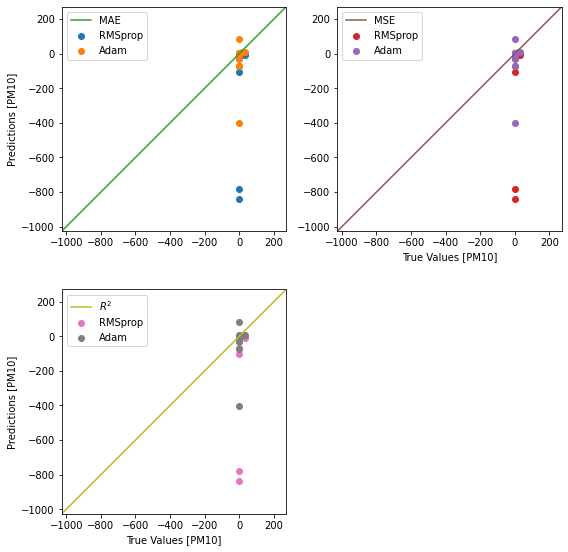

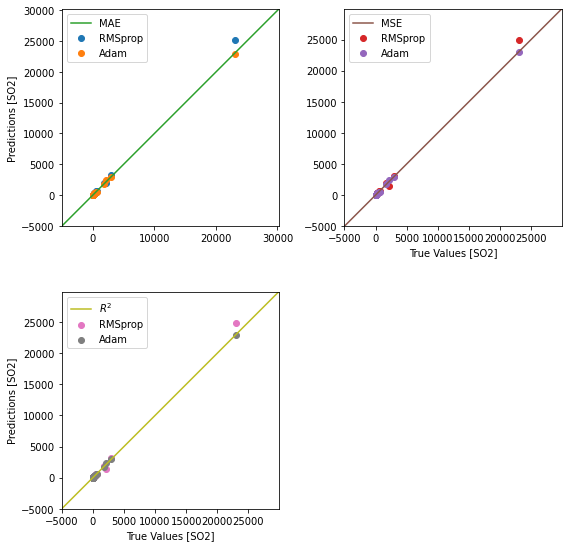

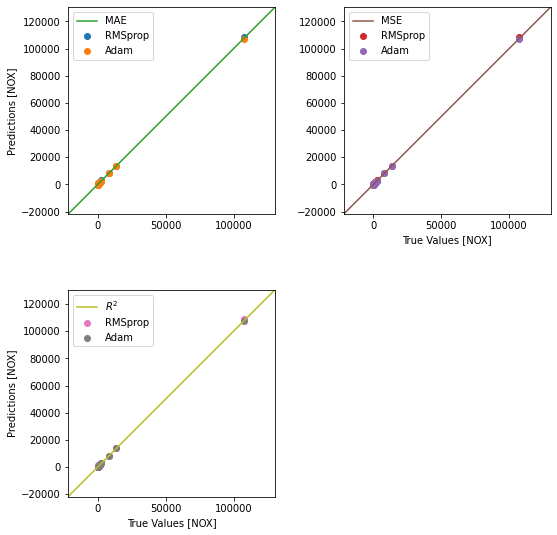

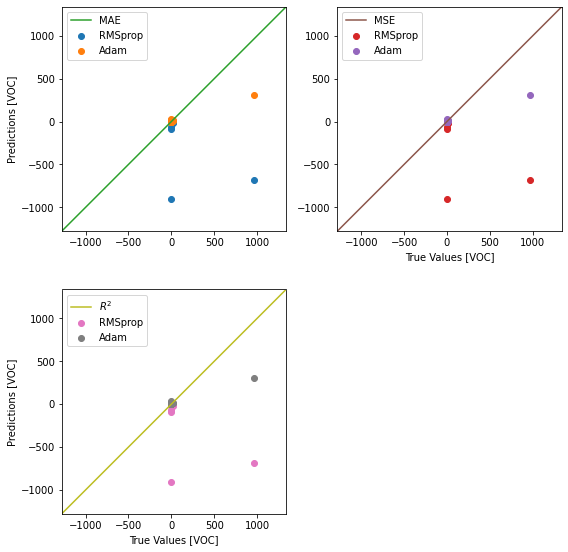

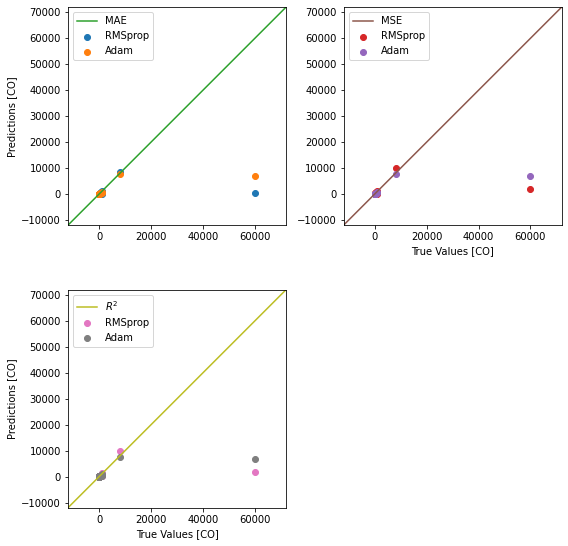

In [73]:
colorNo = 0
prows, pcols = 2,2

for tgt in targetCols:
    fig, axx = plt.subplots(prows, pcols, figsize=(8,8), 
            tight_layout=True
            )
    fig.delaxes(axx[1,1])

    fname = f'{filePrefix}_{tgt}_{prows}{pcols}'

    metricCols = ['mae', 'mse', 
                 'r2'
                #  , 'mse'
                ]
    metricsNo = len(metricCols)

    colorNo += 1
    for j,mtc in enumerate(metricCols):
        
        a = j//2
        b = j%2

        # print(a,b)

        df = dfTestResults
        dfw = df[(df['Component'] == tgt) & (df['Metric'] == mtc)]

        (X_test, y_test) = testData[tgt]

        M,N = dfw.shape

        ax = axx[a,b]
        ax.set_aspect('equal')        

        for i in range(colorNo):
            color = next(ax._get_lines.prop_cycler)['color']

        lims1 = (0,0)

        for i in range(M):
            k = dfw['Model'].iloc[i]
            label = dfw['Optimizer'].iloc[i]

            v = test_results_all[k]
            model = v[0]
            yPred = model.predict(X_test).flatten()
            
            colorNo += 1
            ax.scatter(y_test, yPred, label=label, color = color)
            color = next(ax._get_lines.prop_cycler)['color']

            (x1,x2),(y1,y2) = (min(y_test), max(y_test)), (min(yPred), max(yPred))
            # print((x1,x2),(y1,y2))

            if x1 > y1:
                x1 = y1
            if x2 < y2:
                x2 = y2

            lims0 = (x1, x2)

            # print(lims0)
            (x1,x2),(y1,y2) = lims1, lims0
            if x1 > y1:
                x1 = y1
            if x2 < y2:
                x2 = y2
            lims1 = (x1, x2)
            # print(lims1)

        lims = get_lim([0,0], lims1)
        # print(lims)
        
        if mtc =='r2':
            label = '$R^2$'
        else:
            label = mtc.upper()
        colorNo += 1
        _ = ax.plot(lims, lims, color = color, label=label)

        ax.set_xlim(lims)
        ax.set_ylim(lims)

        xlabel=f'True Values [{tgt}]'
        ylabel=f'Predictions [{tgt}]'

        if j >= ((prows*pcols)-pcols):
            ax.set_xlabel(xlabel)

        if (j+1)%2 == 1:
            ax.set_ylabel(ylabel)
        else:
            if ((j+1) +2) > metricsNo:
                ax.set_xlabel(xlabel)




        # # Shrink current axis by 20%
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))

        # plt.savefig(fname + '.svg')
        # plt.savefig(fname + '.png')

    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')
    plt.show()


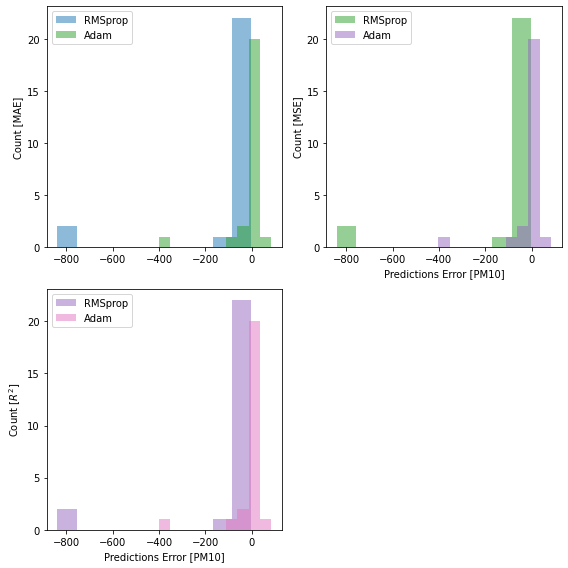

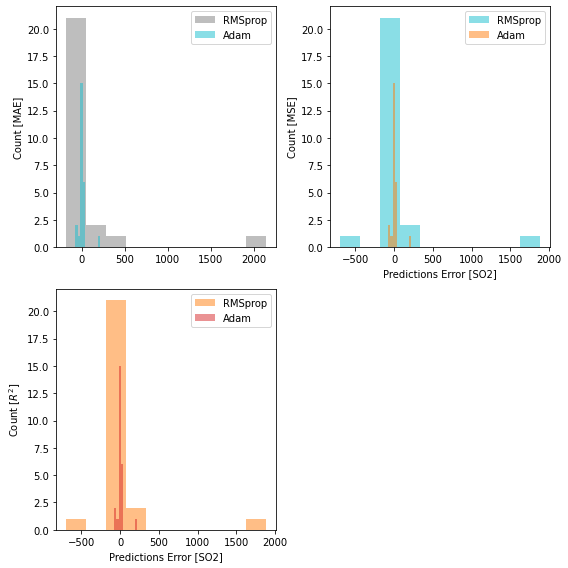

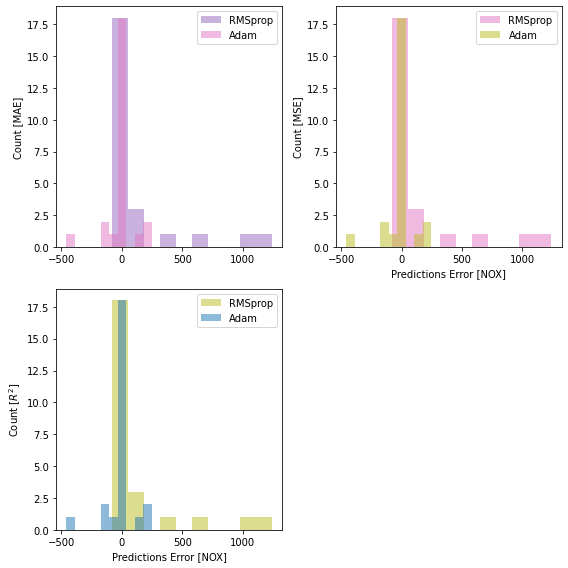

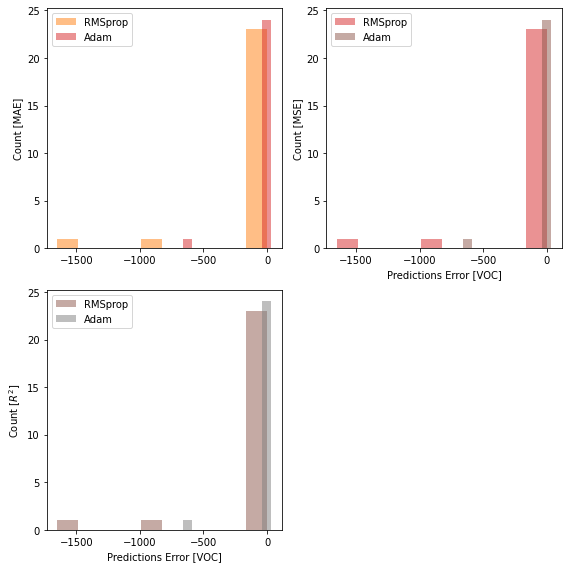

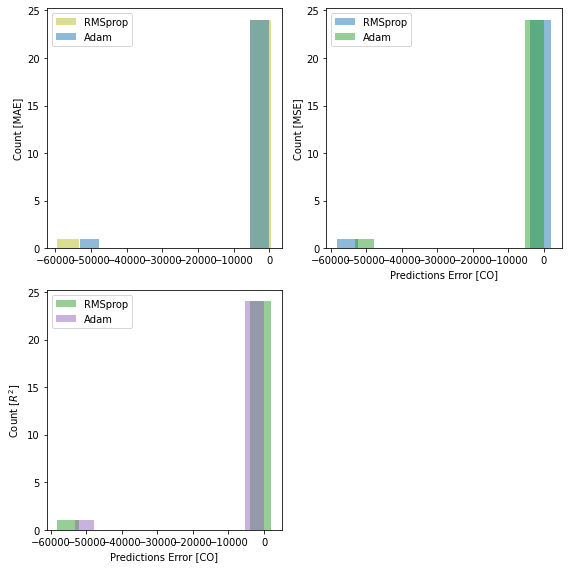

In [74]:
# histogram

colorNo = 0
prows, pcols = 2,2

for tgt in targetCols:
    fig, axx = plt.subplots(prows, pcols, figsize=(8,8), 
            tight_layout=True
            )
    fig.delaxes(axx[1,1])

    fname = f'{filePrefix}_{tgt}_{prows}{pcols}'

    metricCols = ['mae', 
                'mse', 
                 'r2'
                #  , 'mse'
                ]
    metricsNo = len(metricCols)

    colorNo += 1
    for j,mtc in enumerate(metricCols):
        
        a = j//2
        b = j%2

        # print(a,b)

        df = dfTestResults
        dfw = df[(df['Component'] == tgt) & (df['Metric'] == mtc)]

        (X_test, y_test) = testData[tgt]

        M,N = dfw.shape

        ax = axx[a,b]

        for i in range(colorNo):
            color = next(ax._get_lines.prop_cycler)['color']

        lims1 = (0,0)

        for i in range(M):
            k = dfw['Model'].iloc[i]
            label = dfw['Optimizer'].iloc[i]

            v = test_results_all[k]
            model = v[0]
            yPred = model.predict(X_test).flatten()

            error = yPred - y_test

            ax.hist(error, 
                    # bins=25, 
                    facecolor=color, alpha=0.5, label=label)
            colorNo += 1
            color = next(ax._get_lines.prop_cycler)['color']


        if mtc =='r2':
            label = '$R^2$'
        else:
            label = mtc.upper()

        xlabel=f'Predictions Error [{tgt}]'
        ylabel=f'Count [{label}]'

        if j >= ((prows*pcols)-pcols):
            ax.set_xlabel(xlabel)

        if ((j+1)%2 != 1) and ((j+1) +2) > metricsNo:
            ax.set_xlabel(xlabel)

        if True or (j+1)%2 == 1:
            ax.set_ylabel(ylabel)
            

        # Put a legend to the right of the current axis
        ax.legend(loc='best') #, bbox_to_anchor=(1, 0.5))

        # plt.savefig(fname + '.svg')
        # plt.savefig(fname + '.png')

    plt.savefig(fname + '.svg')
    plt.savefig(fname + '.png')
    plt.show()
